<a href="https://colab.research.google.com/github/rahilshah17/Gesture-recognition-using-wearable-devices/blob/main/Machine_learning_over_headband_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Analysis and preprocessing of the data

In [ ]:
def read_file(path):
  # Read the .log file using pandas
  df = pd.read_csv(path, delimiter=',', header=None)

  # Rename the columns of the dataframe
  df.columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'dt']

  # Drop the Date and Time columns
  # df.drop(['Date', 'Time'], axis=1, inplace=True)

  return df

In [ ]:
# Forming 3 data frames for the diffenrent gestures

# Initialize an empty DataFrame with specific column names
raise_head = pd.DataFrame(columns=['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'dt'])
no_motion = pd.DataFrame(columns=['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'dt'])
back = pd.DataFrame(columns=['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'dt'])

In [ ]:
aj1 = read_file('/content/drive/MyDrive/iGest_Data_Collection/Ajmal/Day 1/Mrng/aj_m1_1.log')
data = aj1.copy()

In [ ]:
aj1

ax    ay    az     gx     gy     gz      mx      my      mz    dt
0   -0.26 -1.13  0.40 -11.56 -15.10  -5.36 -474.57  214.92  129.13  12.0
1   -0.26 -1.13  0.40 -11.52 -15.50  -5.29 -482.19  213.39  110.03  12.0
2   -0.26 -1.13  0.40 -11.14 -15.56  -5.30 -473.05  213.39  110.03  12.0
3   -0.26 -1.14  0.40 -11.17 -15.70  -5.23 -468.48  202.69  105.63  12.0
4   -0.27 -1.14  0.40 -11.15 -15.46  -4.99 -474.57  211.86  123.25  13.0
..    ...   ...   ...    ...    ...    ...     ...     ...     ...   ...
497 -0.01 -1.22  0.29 -10.84  -6.75   2.94 -448.66  204.22  110.03  12.0
498 -0.01 -1.21  0.29  -9.94  -9.27   2.87 -447.14  202.69  117.38  12.0
499 -0.04 -1.24  0.29  -8.68 -10.87   2.87 -439.51  195.04  121.78  13.0
500 -0.04 -1.25  0.29  -8.79 -12.42   5.78 -447.14  193.51  123.25  12.0
501 -0.06 -1.22  0.29  -9.17 -16.14  10.44 -448.66  207.28  112.97  12.0

[502 rows x 10 columns]

So, this how data looks in one of the files

In [ ]:
aj2 = read_file('/content/drive/MyDrive/iGest_Data_Collection/Ajmal/Day 1/Mrng/aj_m1_2.log')
aj3 = read_file('/content/drive/MyDrive/iGest_Data_Collection/Ajmal/Day 1/Mrng/aj_m1_3.log')
data = pd.concat([aj1,aj2,aj3],axis=0).reset_index(drop=True)

In [ ]:
def plot_data(df,i):
  right_arrow = "\u2192"
  # Plot the curves for each column of data
  plt.plot(df.index*12, df['ax'], label='ax')
  plt.plot(df.index*12, df['ay'], label='ay')
  plt.plot(df.index*12, df['az'], label='az')
  plt.plot(df.index*12, df['gx'], label='gx')
  plt.plot(df.index*12, df['gy'], label='gy')
  plt.plot(df.index*12, df['gz'], label='gz')
  # plt.plot(df.index*12, df['mx'], label='mx')
  # plt.plot(df.index*12, df['my'], label='my')
  # plt.plot(df.index*12, df['mz'], label='mz')

  # Add legend and axis labels
  plt.title("Sample number "+str(i))
  plt.legend()
  plt.xlabel('time (ms) '+right_arrow)
  plt.ylabel('Value (si units) '+right_arrow)

  # Show the plot
  plt.show()

####Analysing the subject Ajmal's data

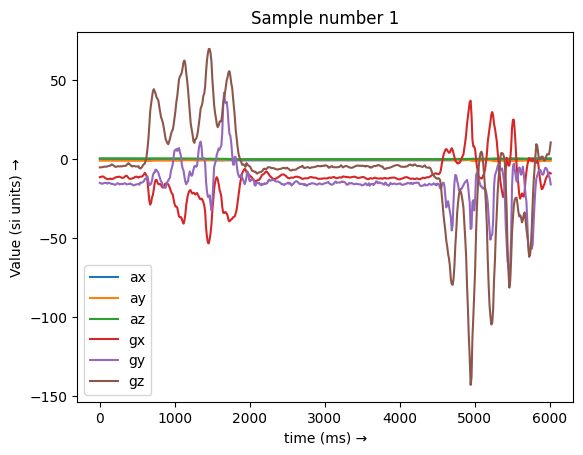

In [ ]:
plot_data(aj1,1)

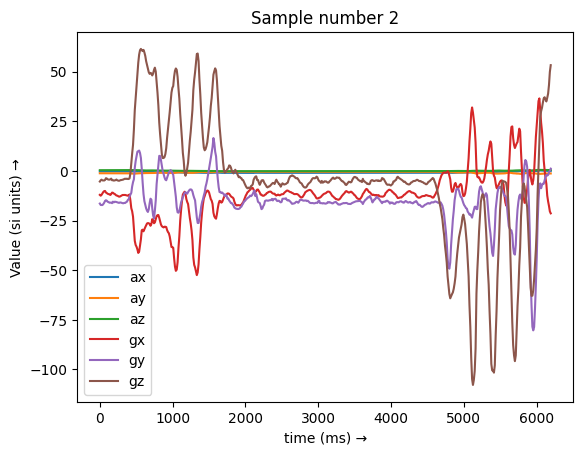

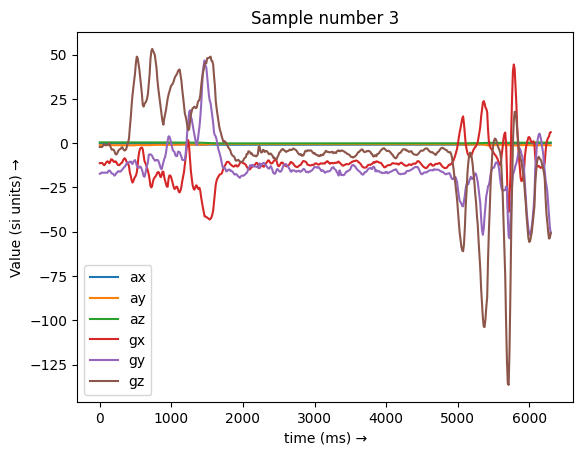

In [ ]:
plot_data(aj2,2)
plot_data(aj3,3)

So, this is how our variation looks like with time

Storing all the Subject Ajmal's data in 1 dictionary named aj

In [ ]:
aj = {}
for i in range(1,11):
  aj[i-1] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Ajmal/Day 1/Mrng/aj_m1_'+(str(i))+'.log')
  if i>5:
    data = pd.concat([data,aj[i-1]],axis=0).reset_index(drop=True)

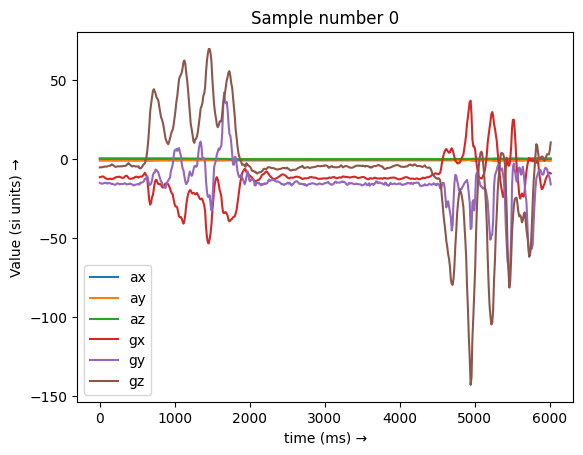

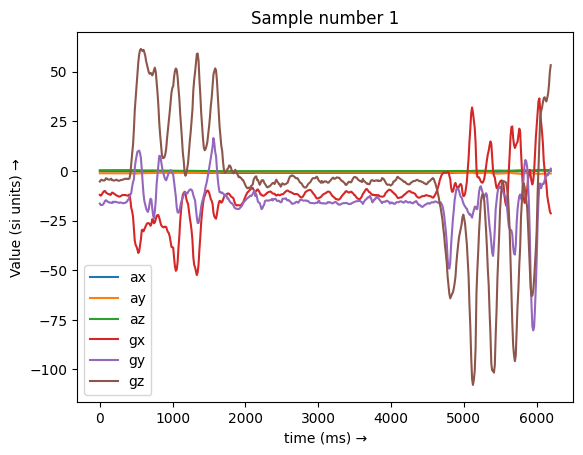

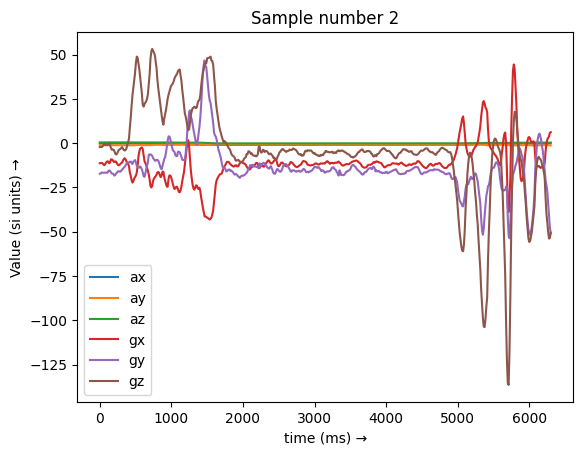

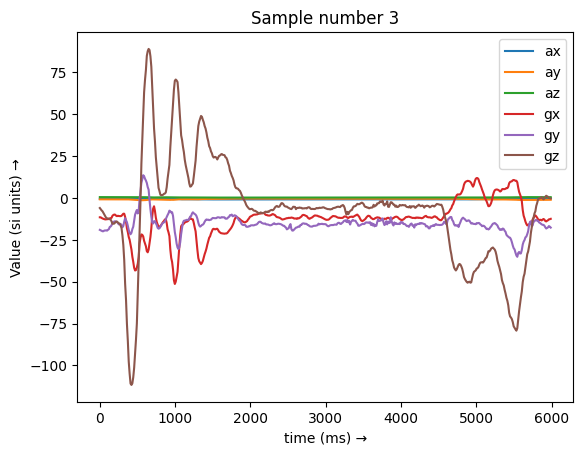

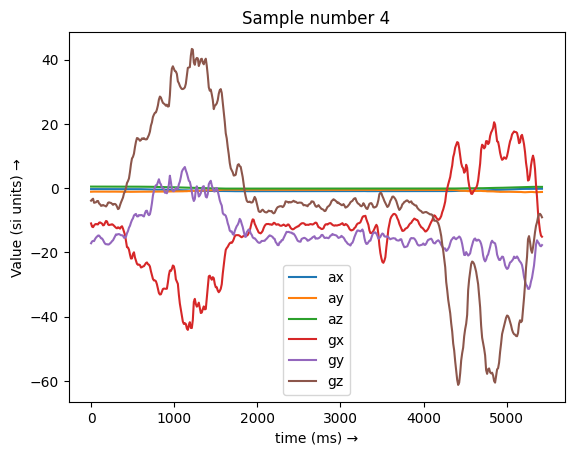

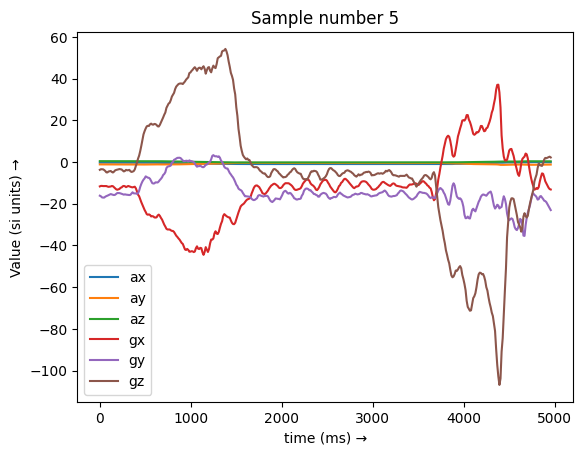

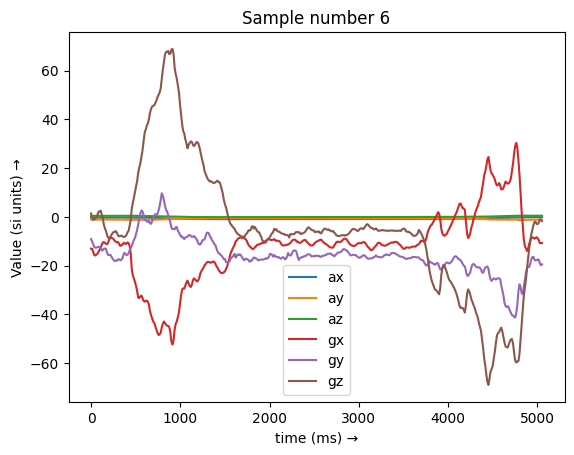

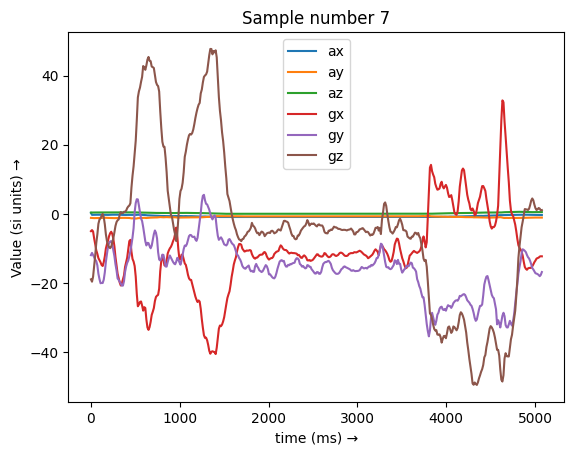

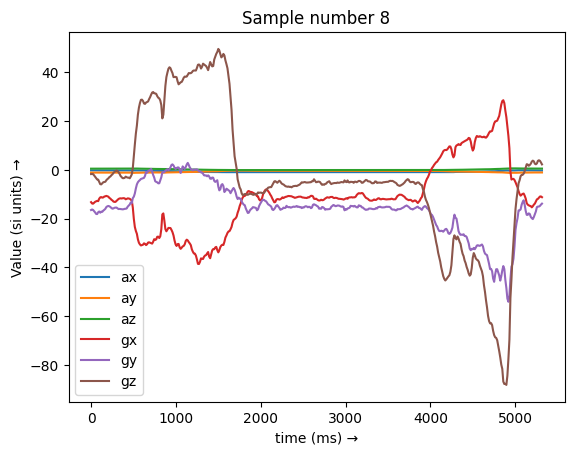

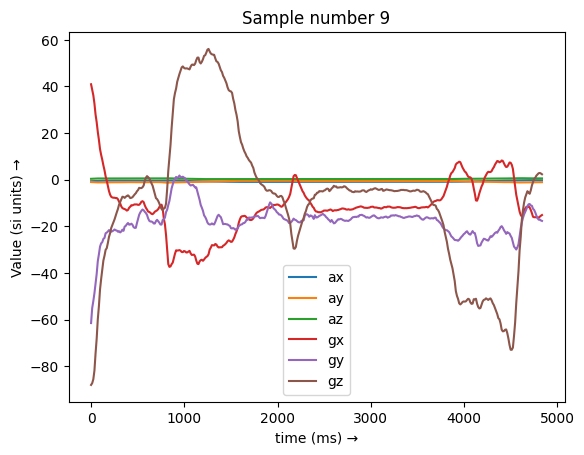

In [ ]:
# Plotting all the data collected
for i in range(10):
  plot_data(aj[i],i)

In [ ]:
for i in range(1,11):
  aj[i+9] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Ajmal/Day 1/Aftn/aj_a_'+(str(i))+'.log')
  data = pd.concat([data,aj[i+9]],axis=0).reset_index(drop=True)

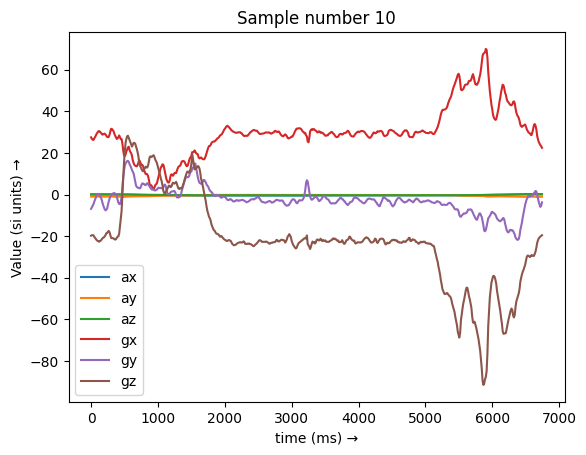

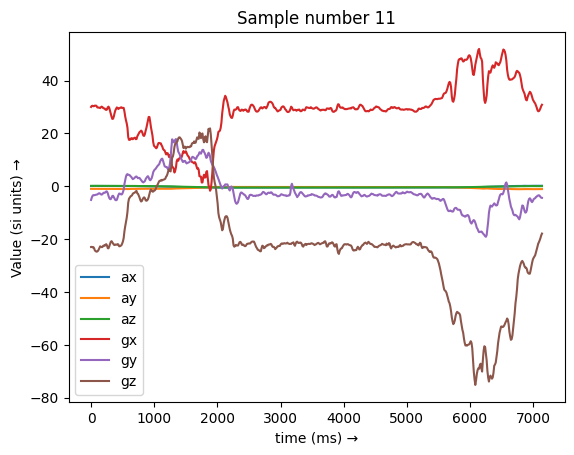

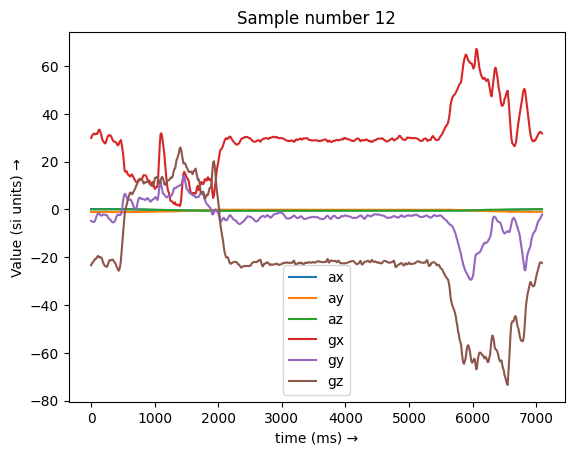

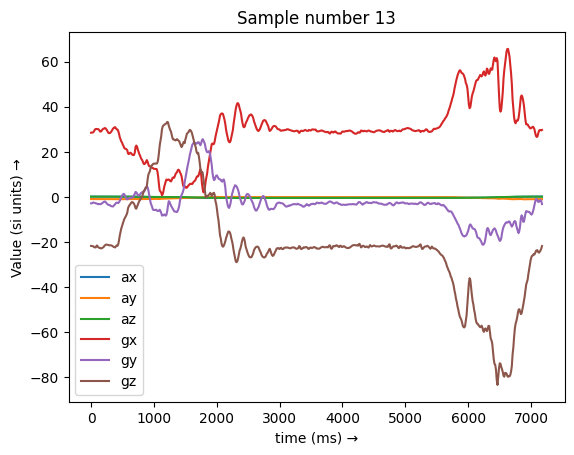

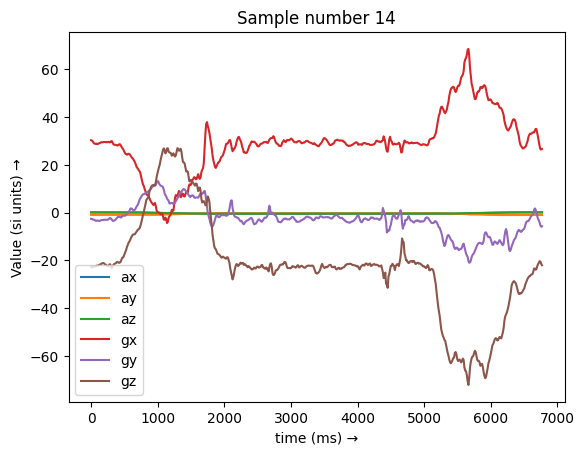

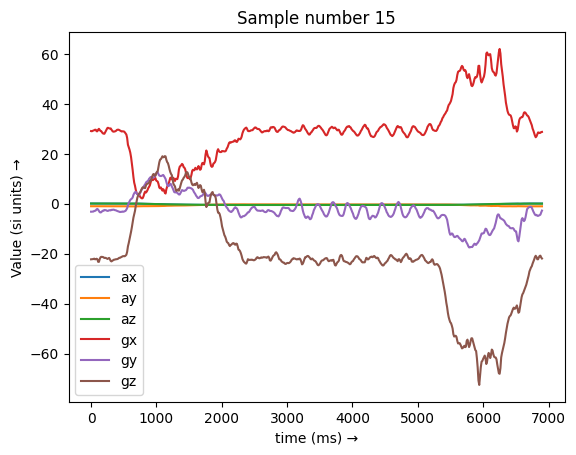

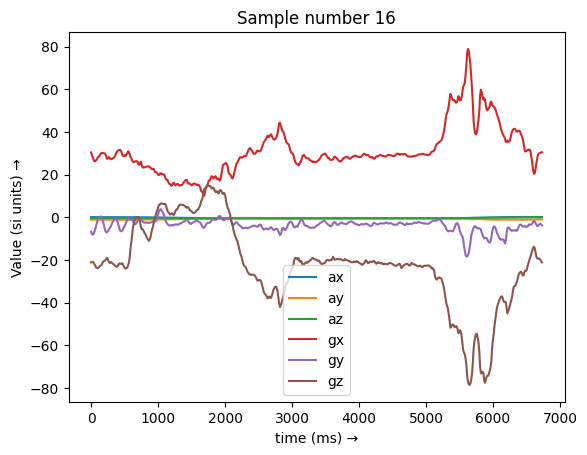

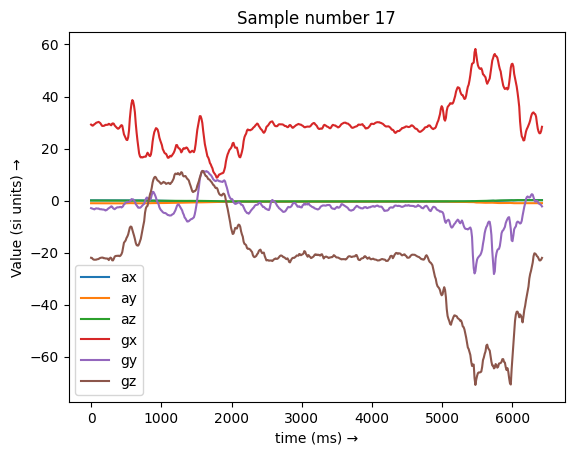

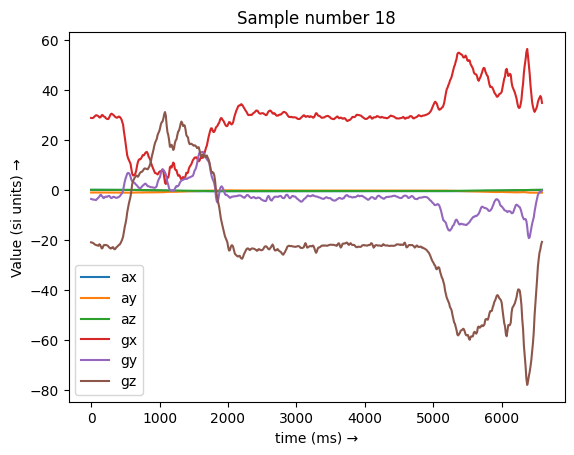

In [ ]:
for i in range(10,19):
  plot_data(aj[i],i)

####Analysing the subject Anu's data

Reading the data

In [ ]:
an = {}
for i in range(10):
  an[i] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Anu/Day 1/Mrng/an_m1_'+(str(i))+'.log')
  data = pd.concat([data,an[i]],axis=0).reset_index(drop=True)

In [ ]:
for i in range(10):
  an[i+10] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Anu/Day 1/Aftn/an_a_'+(str(i))+'.log')
  data = pd.concat([data,an[i+10]],axis=0).reset_index(drop=True)

In [ ]:
for i in range(10):
  an[i+20] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Anu/Day 1/Eve/an_e_'+(str(i))+'.log')
  data = pd.concat([data,an[i+20]],axis=0).reset_index(drop=True)


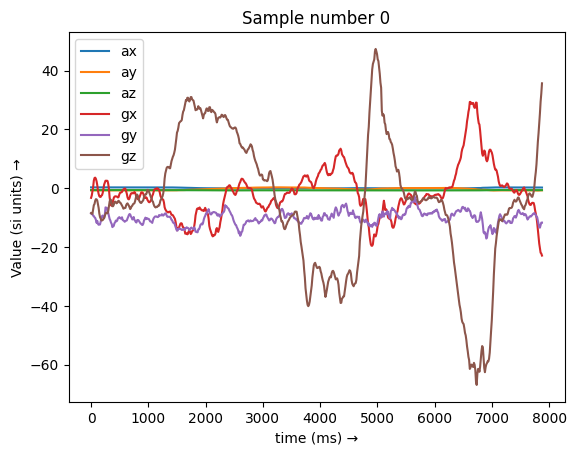

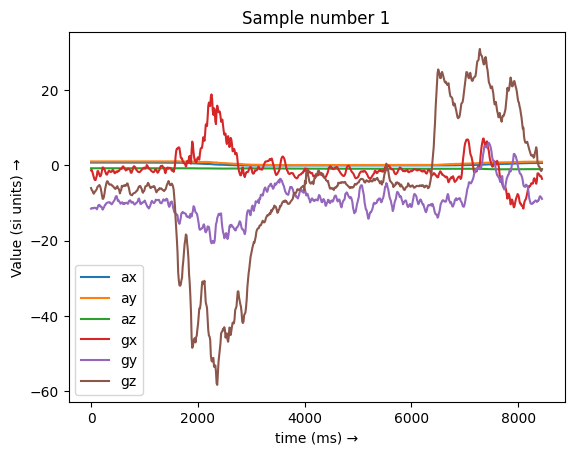

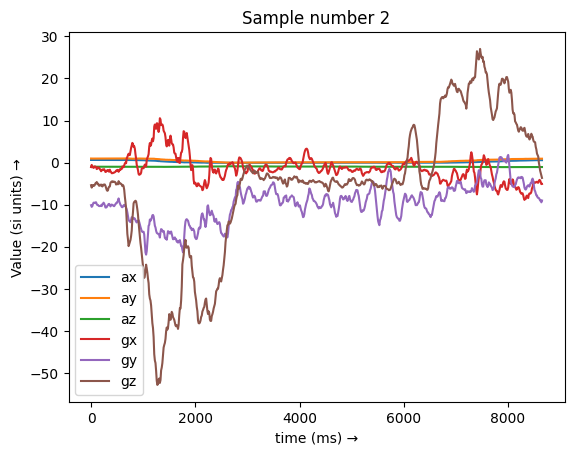

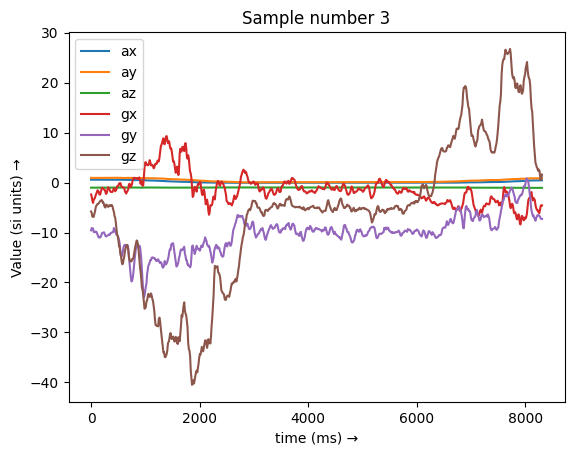

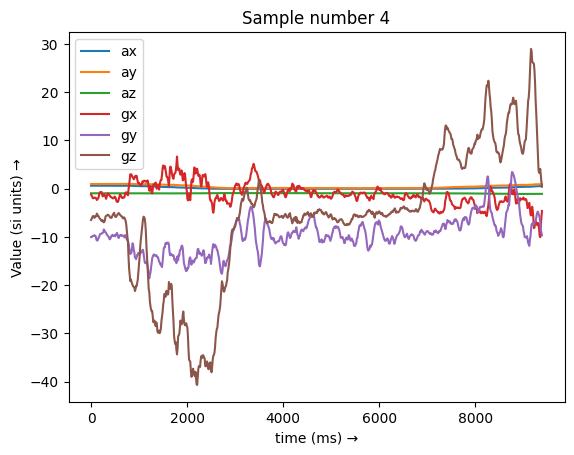

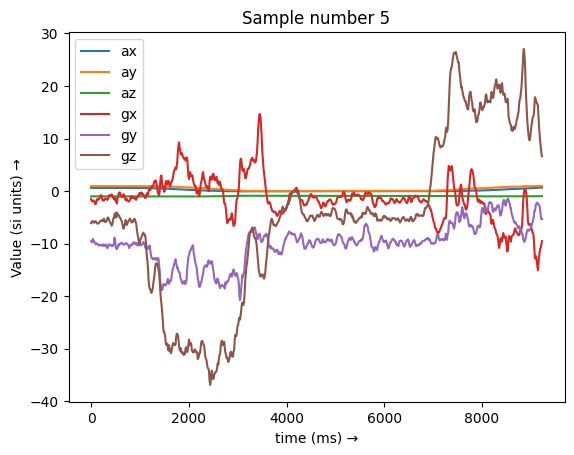

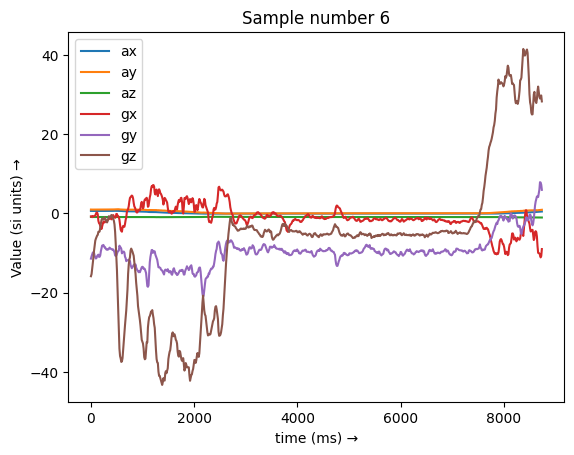

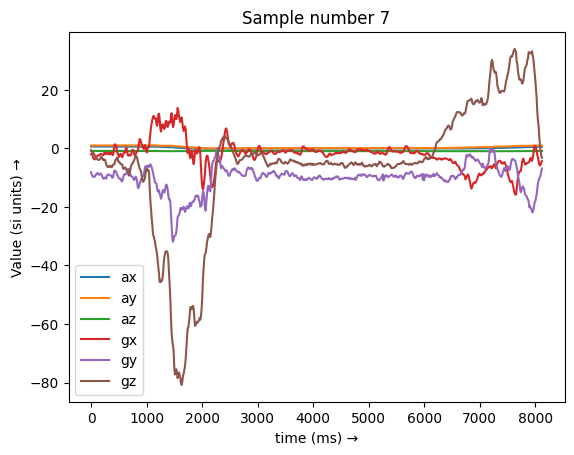

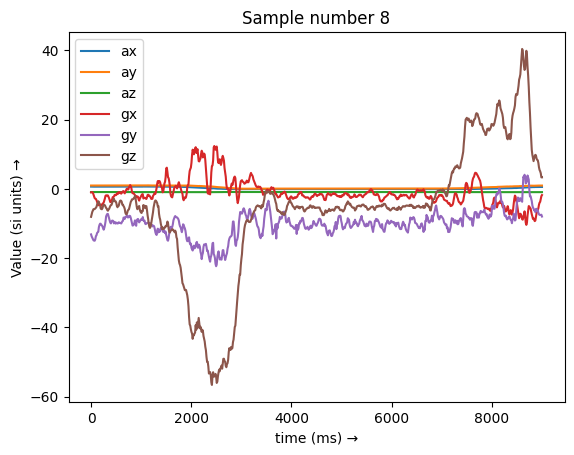

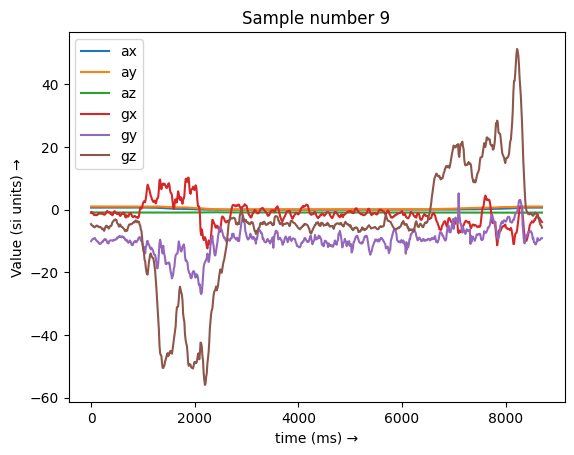

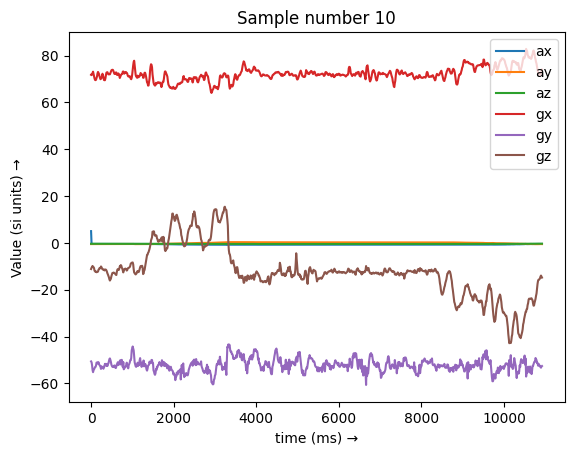

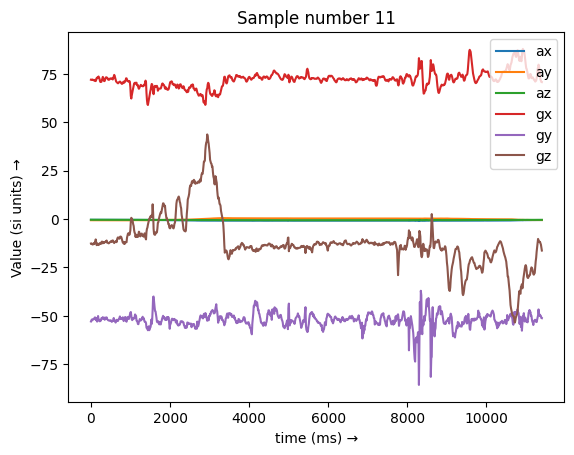

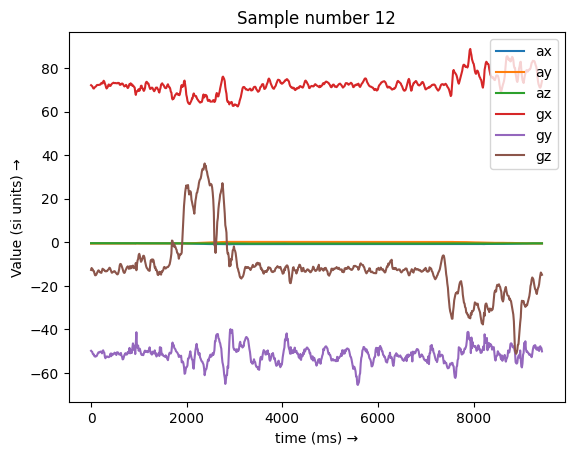

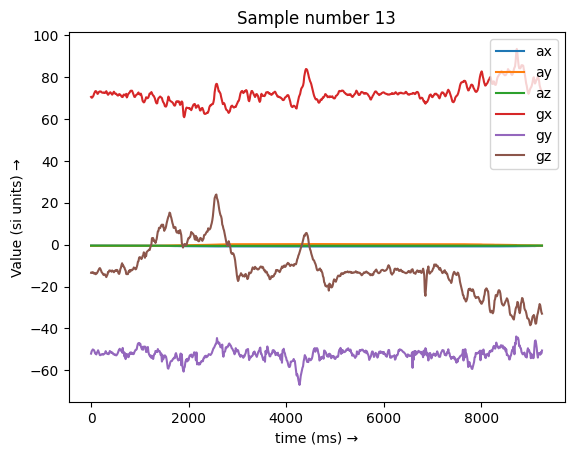

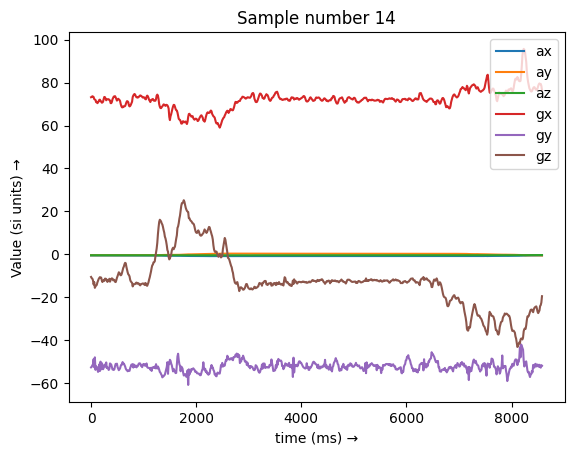

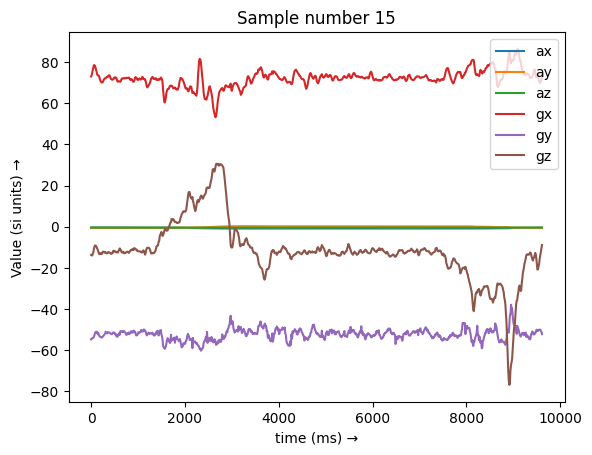

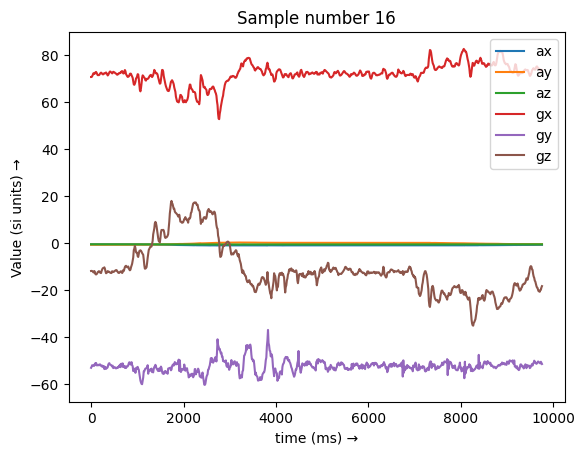

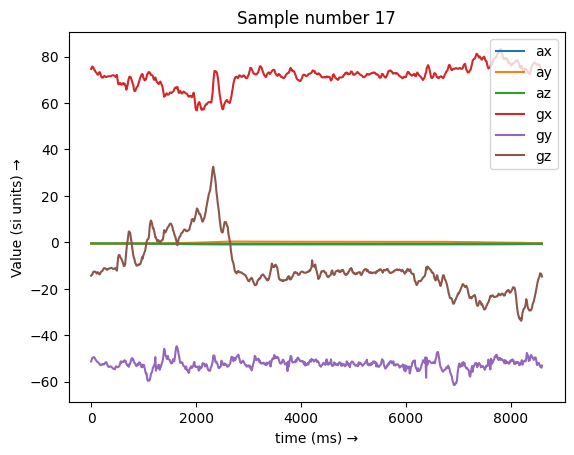

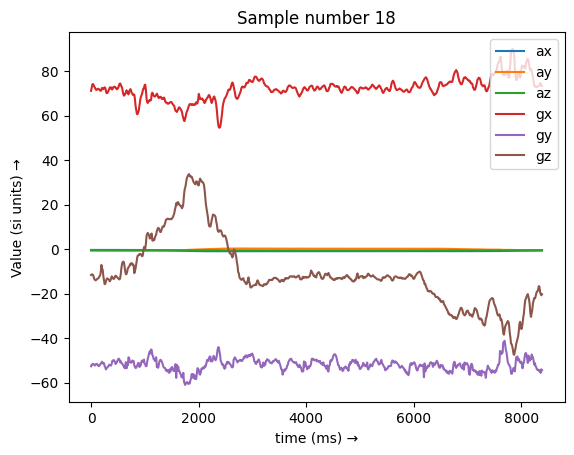

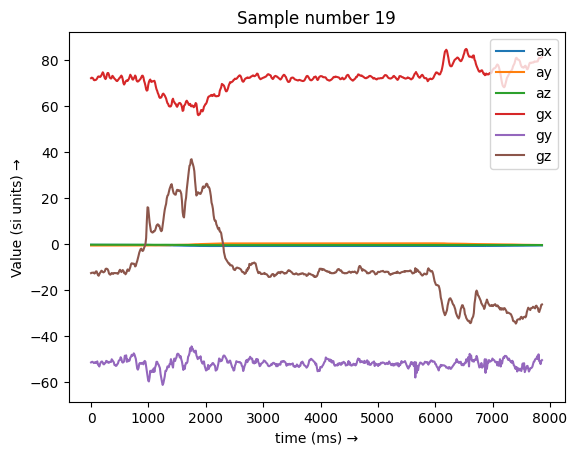

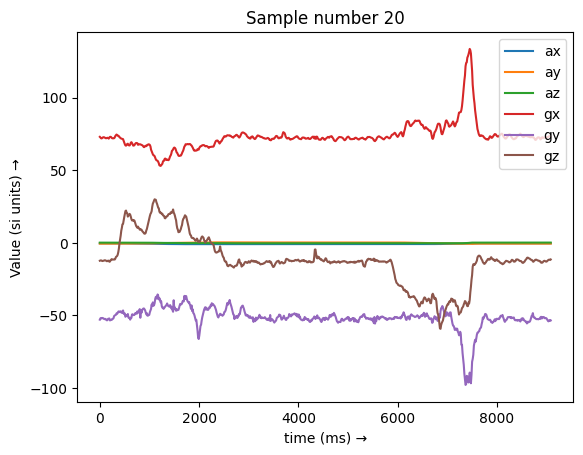

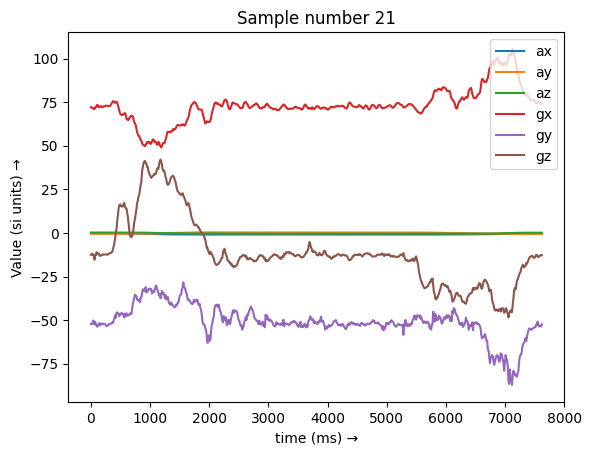

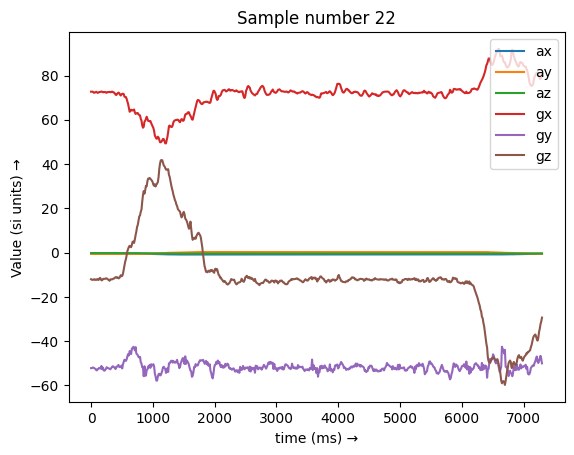

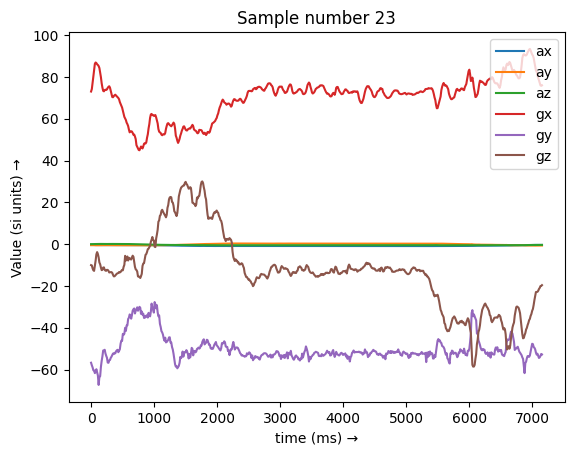

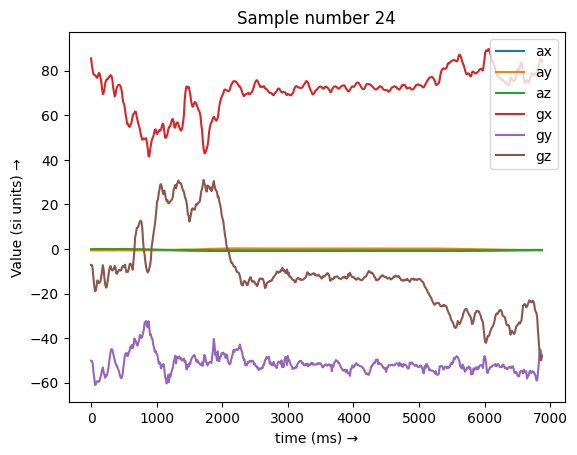

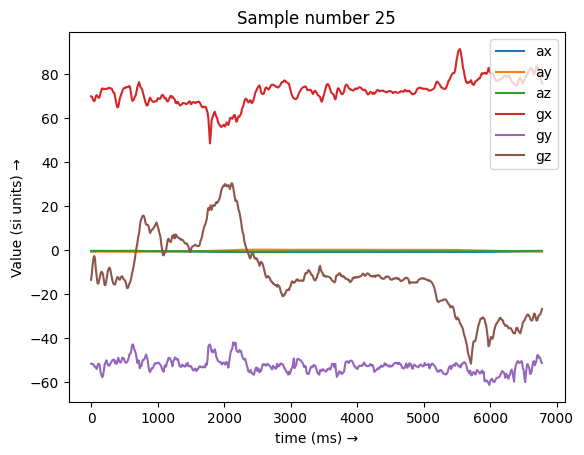

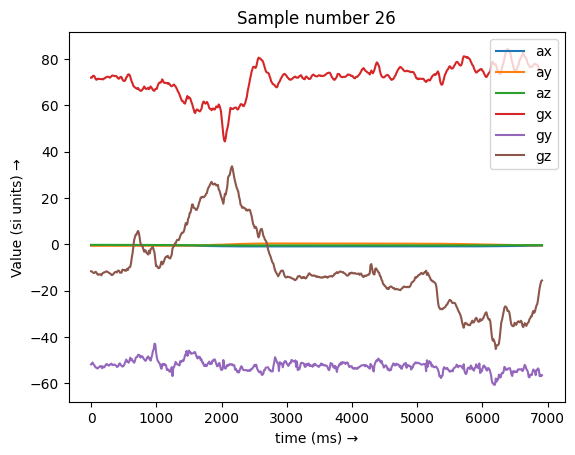

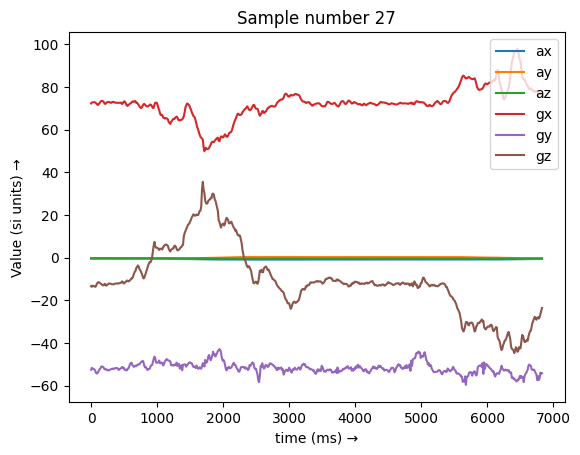

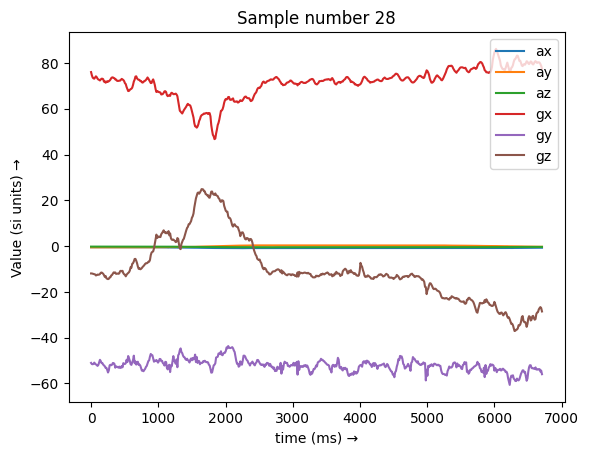

In [ ]:
for i in range(29):
  plot_data(an[i],i)

This subject's data is too much noisy and it is quite difficult to understand what is which gesture hence we skip the use of the above data and move on to check if we find anything else to be useful

####Analysing the subject Kumaresan's data

Reading the data

In [ ]:
km = {}
for i in range(1,11):
  km[i-1] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Kumaresan/Day 1/Mrng/ku_m_'+(str(i))+'.log')
  data = pd.concat([data,km[i-1]],axis=0).reset_index(drop=True)


In [ ]:
for i in range(10):
  km[i+10] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Kumaresan/Day 1/Aftn/ku_a_'+(str(i))+'.log')
  data = pd.concat([data,km[i+10]],axis=0).reset_index(drop=True)


In [ ]:
for i in range(10):
  km[i+20] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Kumaresan/Day 1/Eve/ku_e_'+(str(i))+'.log')
  data = pd.concat([data,km[i+20]],axis=0).reset_index(drop=True)


In [ ]:
for i in range(10):
  km[i+30] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Kumaresan/Day 2/Mrng/ku2_m_'+(str(i))+'.log')
  data = pd.concat([data,km[i+30]],axis=0).reset_index(drop=True)


In [ ]:
for i in range(10):
  km[i+40] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Kumaresan/Day 2/Aftn/ku2_a_'+(str(i))+'.log')
  data = pd.concat([data,km[i+40]],axis=0).reset_index(drop=True)


In [ ]:
for i in range(10):
  km[i+50] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Kumaresan/Day 2/Eve/ku2_e_'+(str(i))+'.log')
  data = pd.concat([data,km[i+50]],axis=0).reset_index(drop=True)


In [ ]:
for i in range(10):
  km[i+60] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Kumaresan/Day 3/Mrng/ku3_m_'+(str(i))+'.log')
  data = pd.concat([data,km[i+60]],axis=0).reset_index(drop=True)


In [ ]:
for i in range(10):
  km[i+70] =  read_file('/content/drive/MyDrive/iGest_Data_Collection/Kumaresan/Day 3/Aftn/ku3_a_'+(str(i))+'.log')
  data = pd.concat([data,km[i+70]],axis=0).reset_index(drop=True)


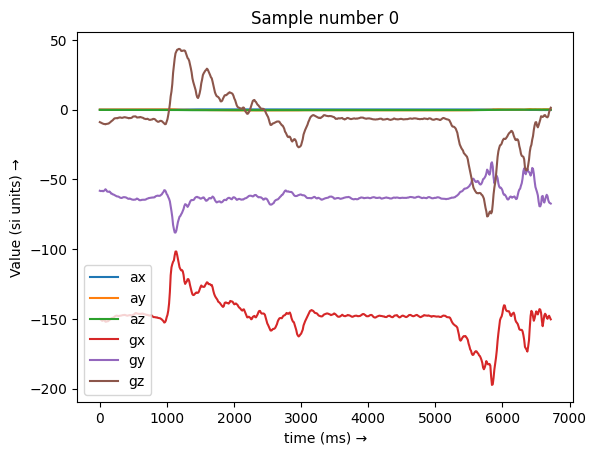

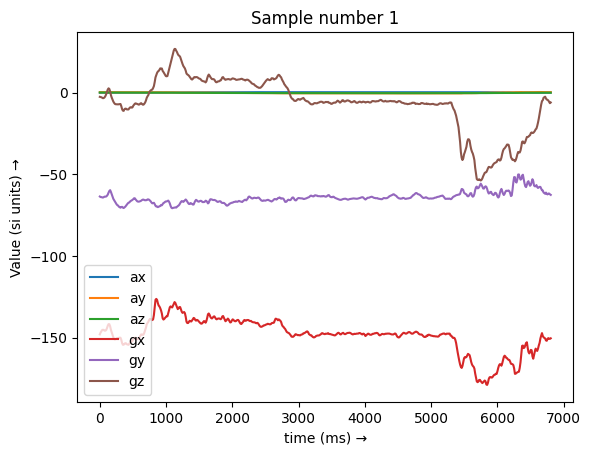

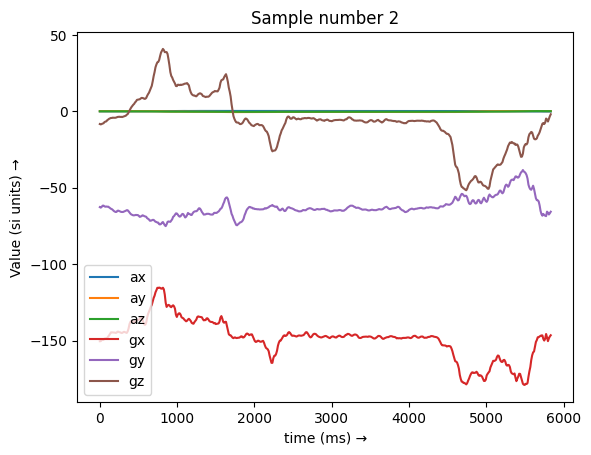

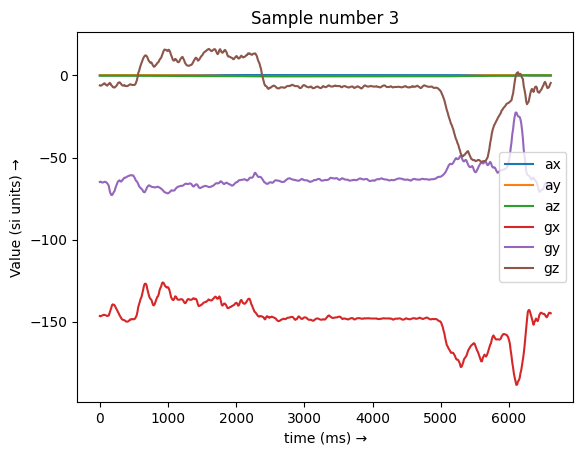

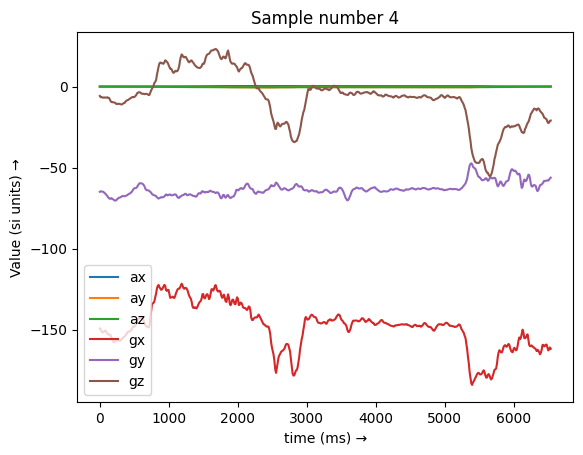

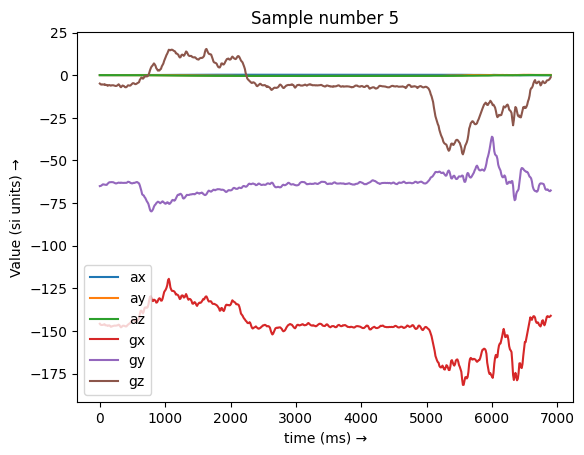

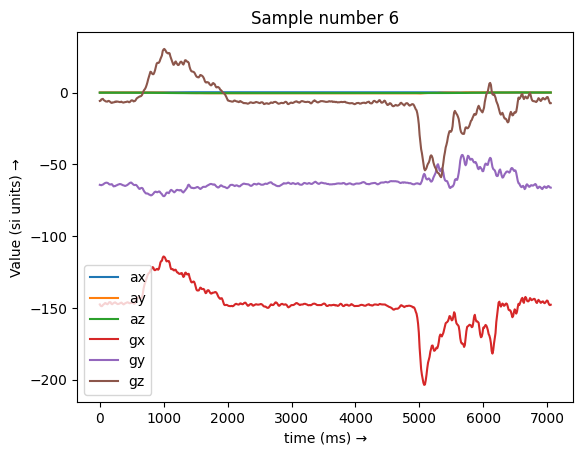

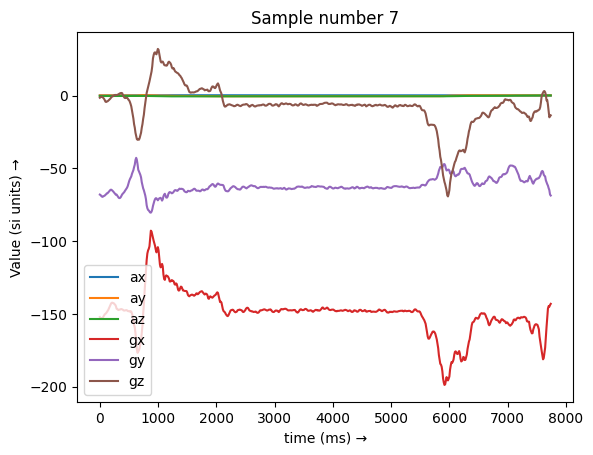

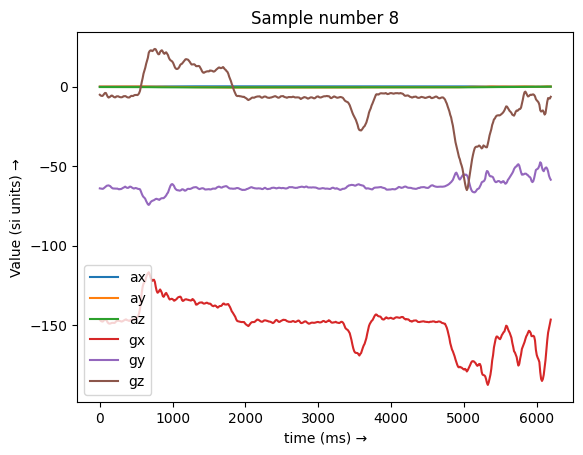

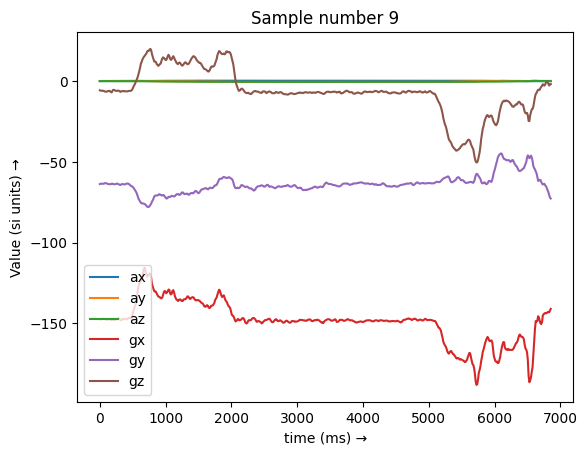

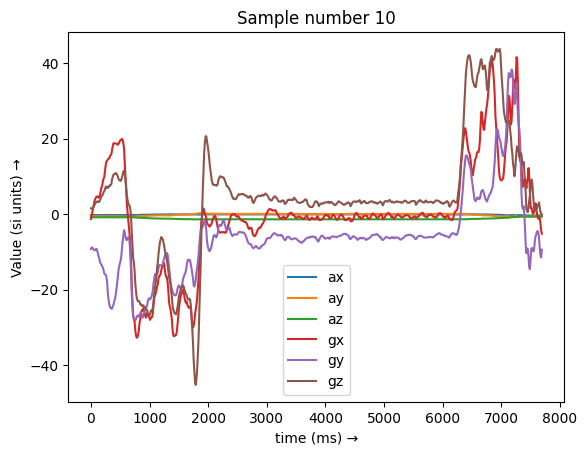

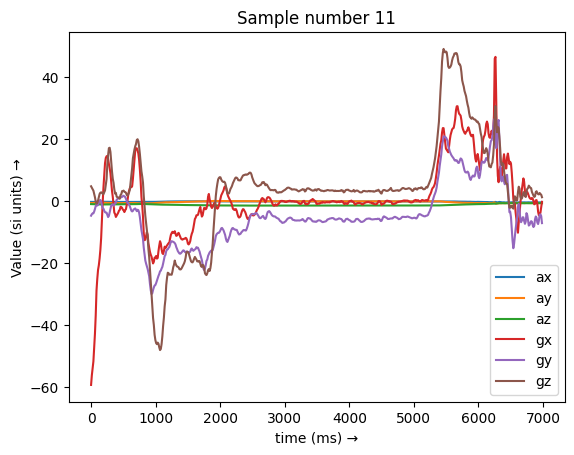

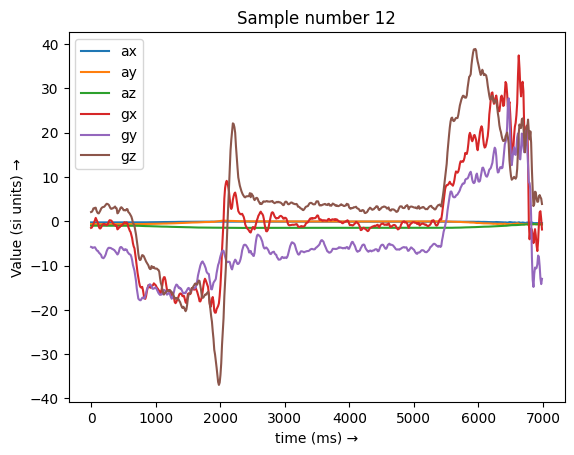

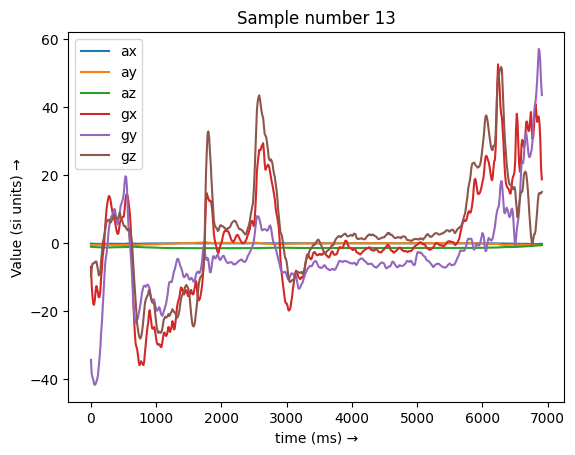

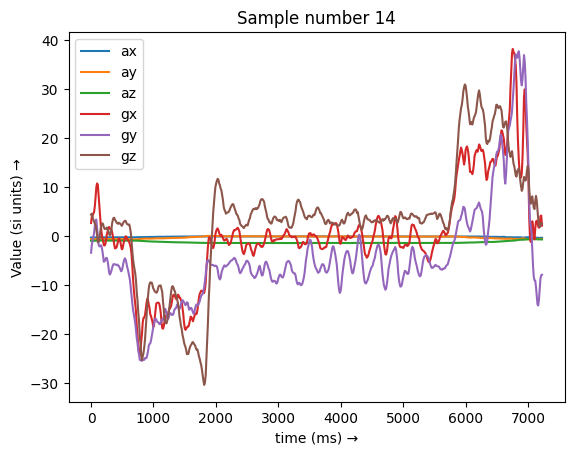

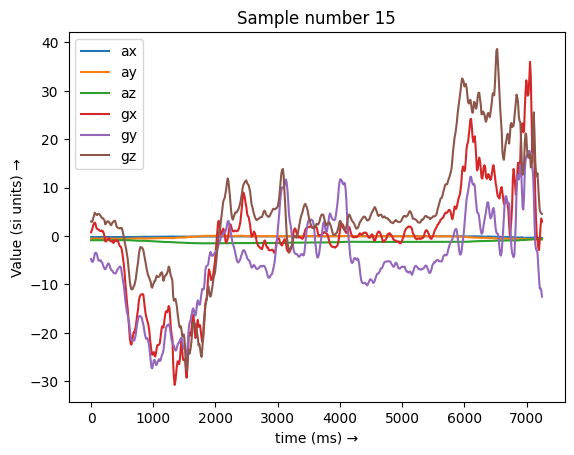

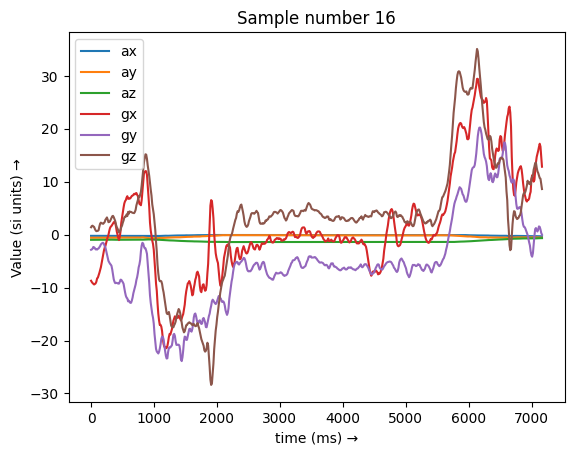

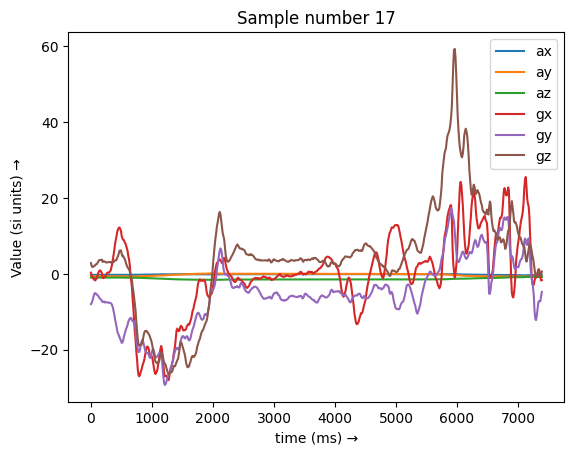

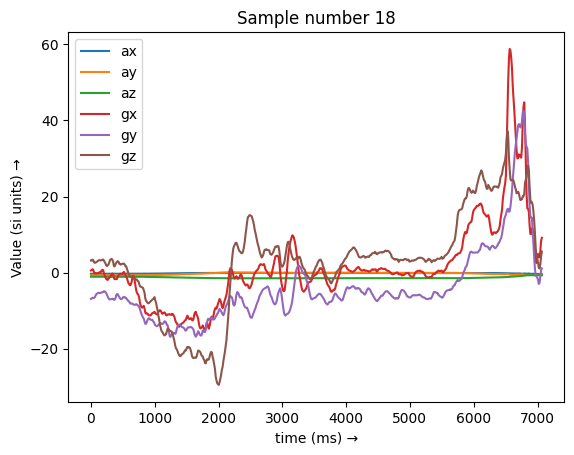

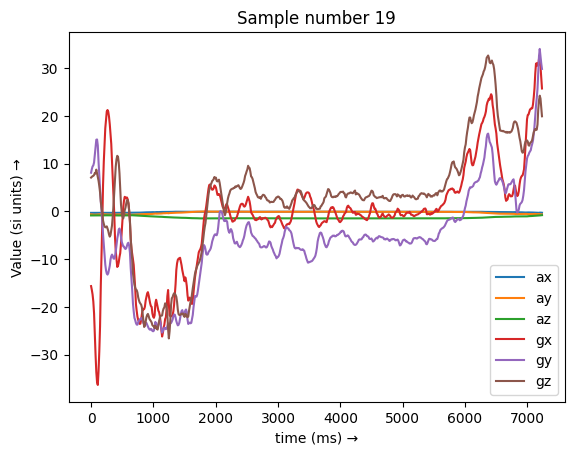

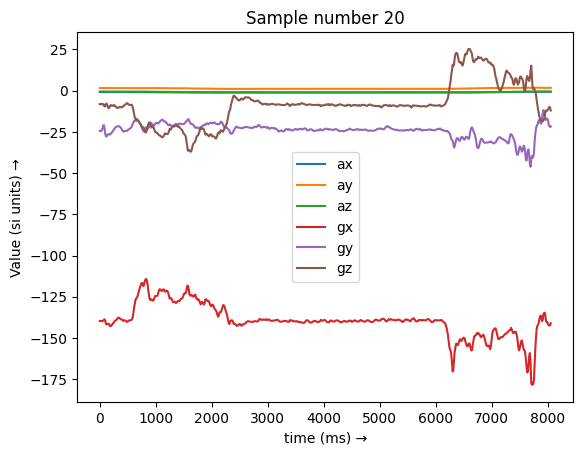

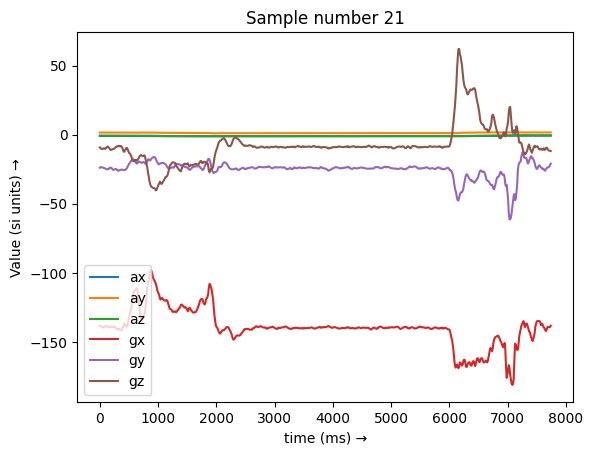

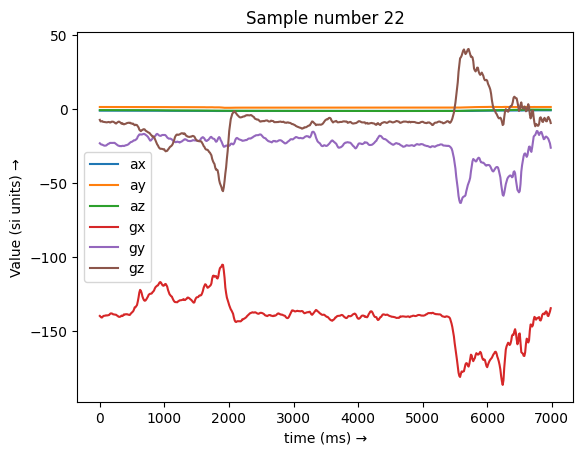

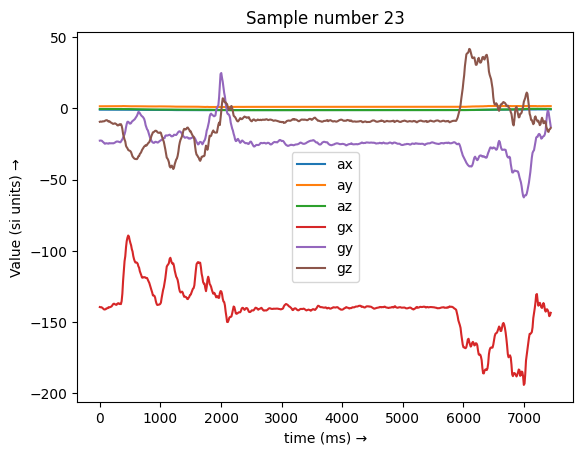

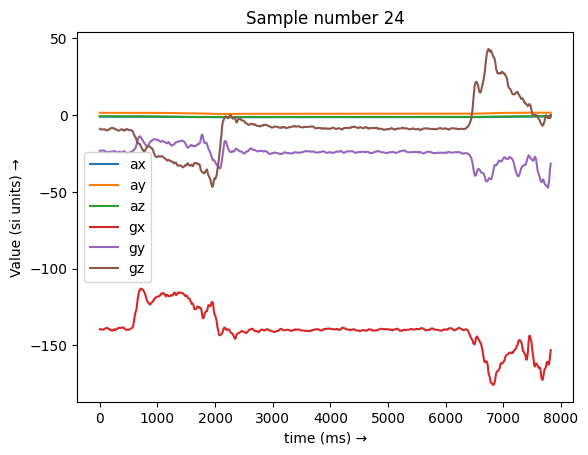

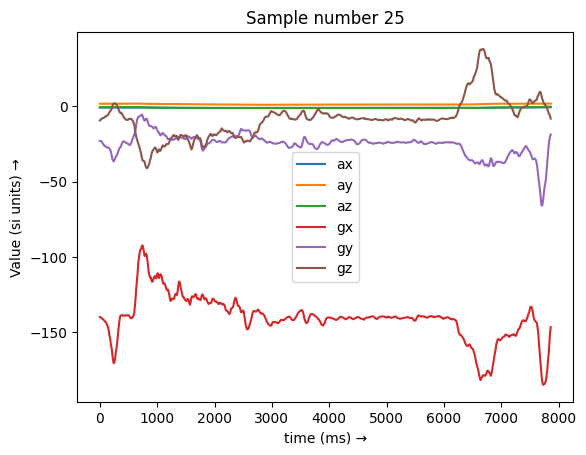

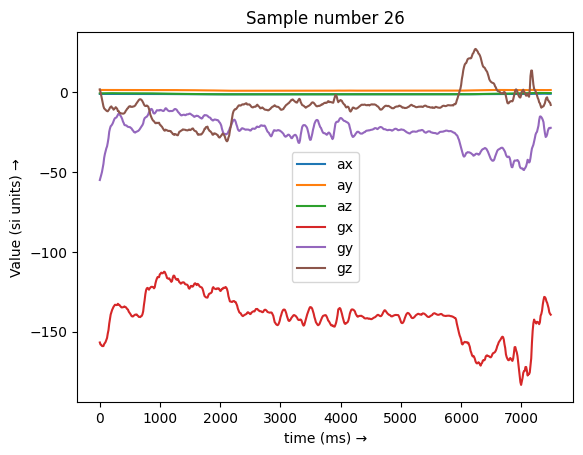

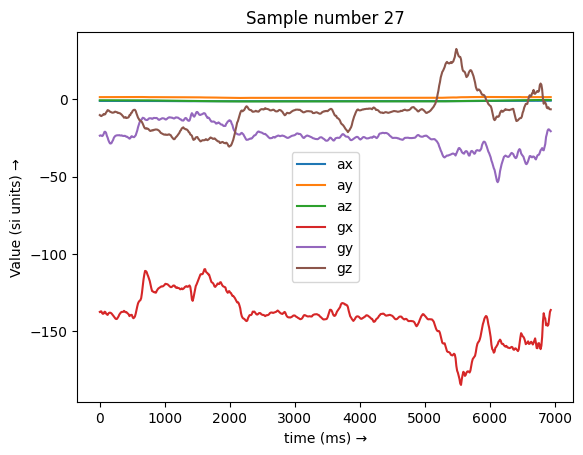

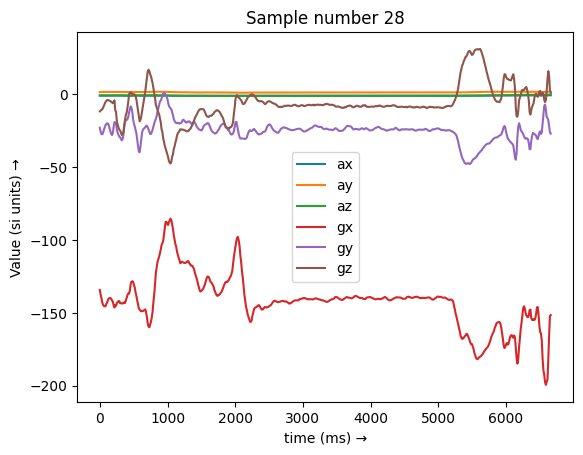

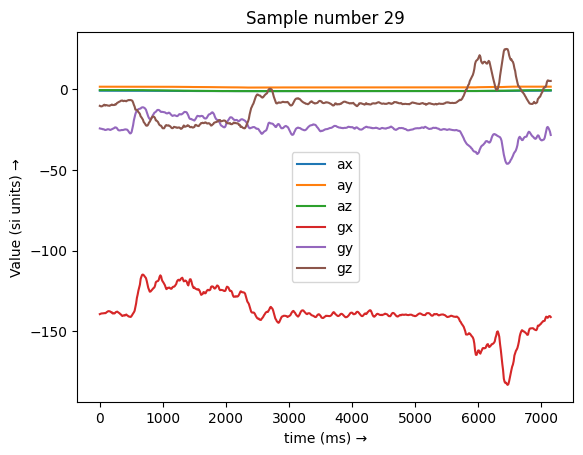

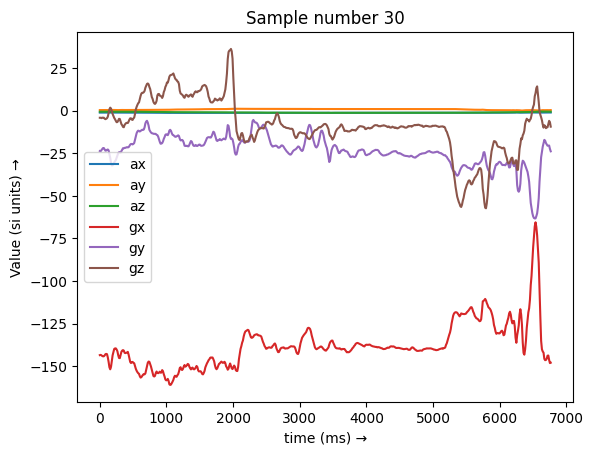

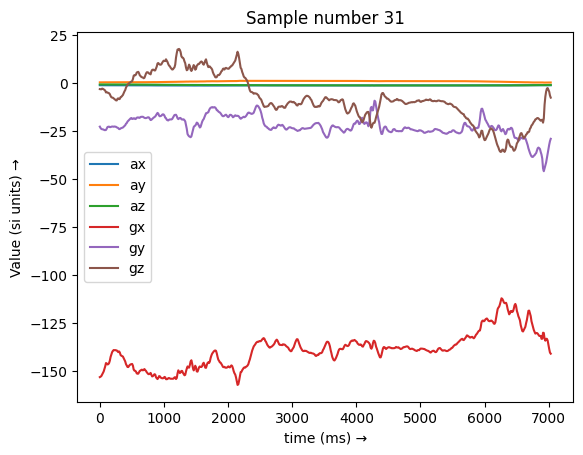

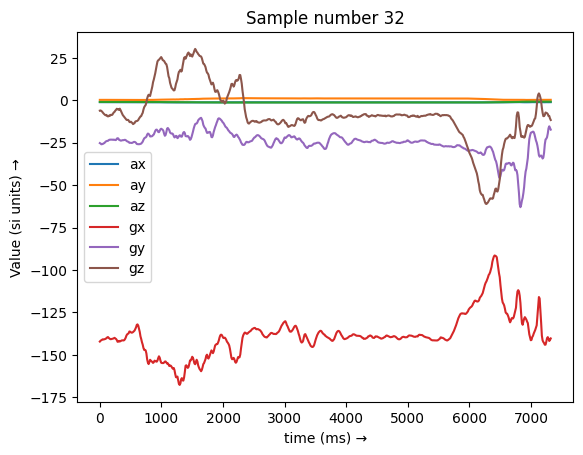

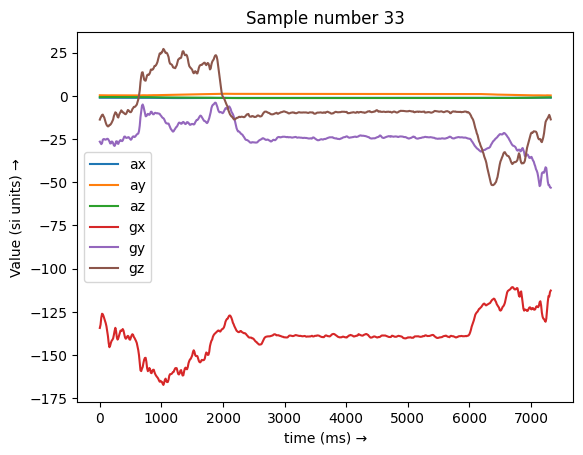

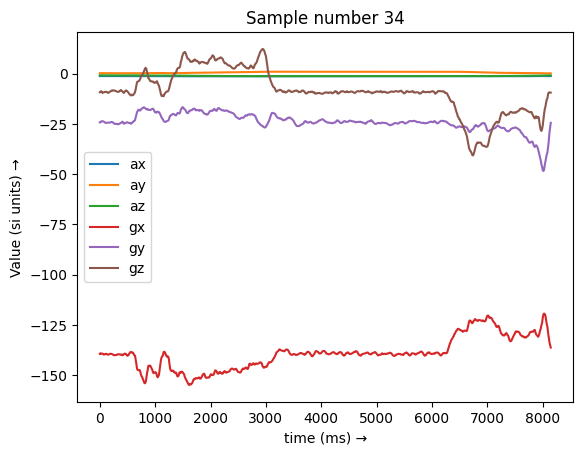

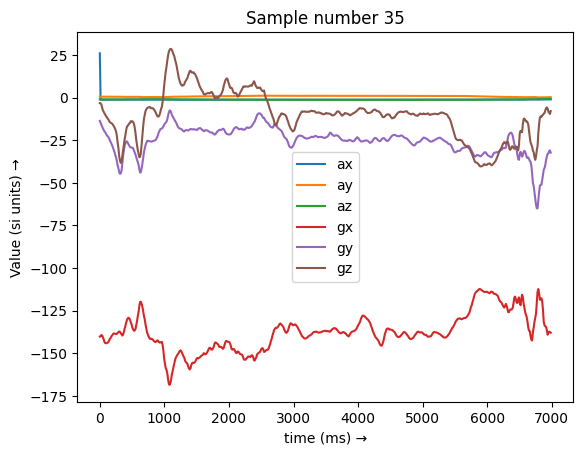

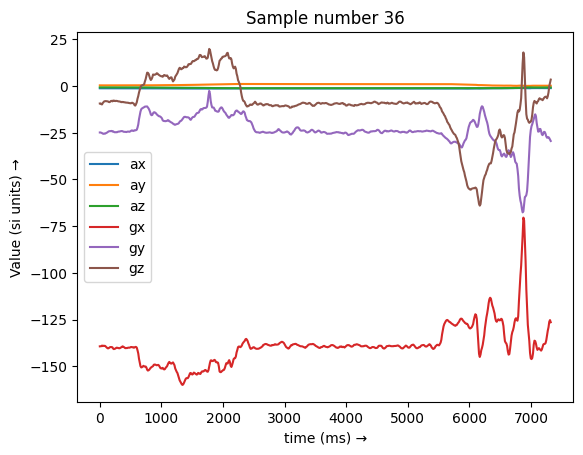

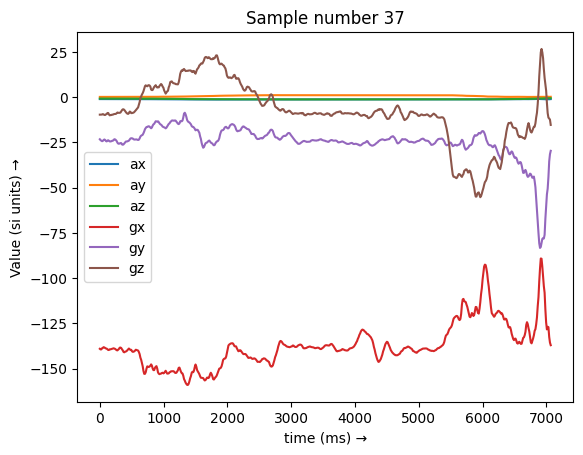

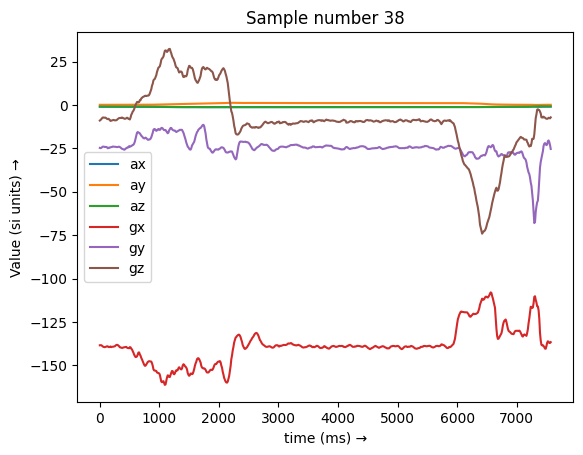

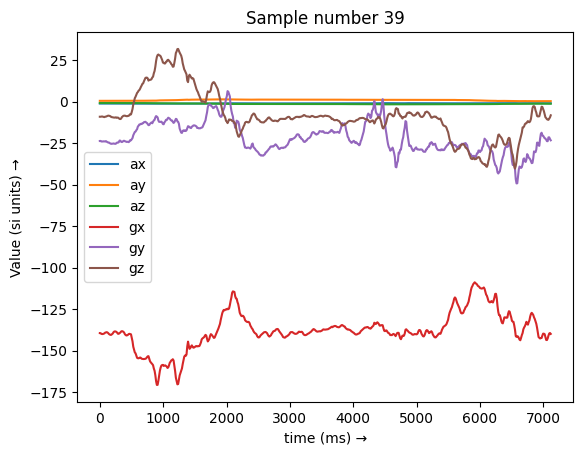

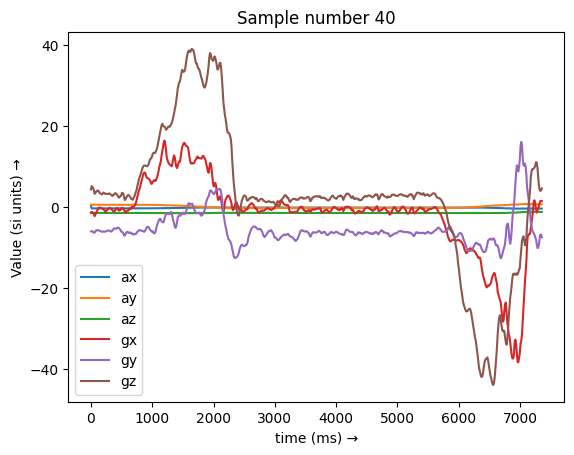

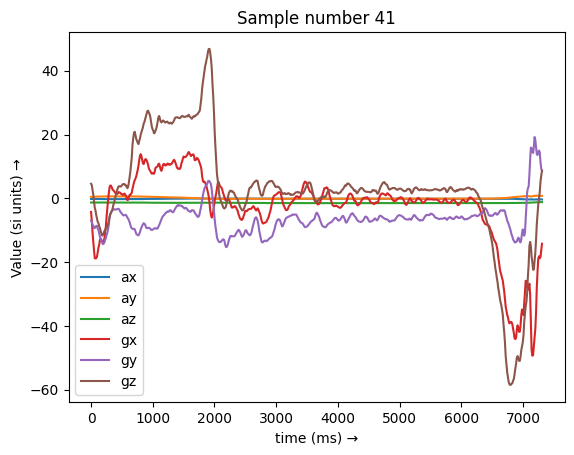

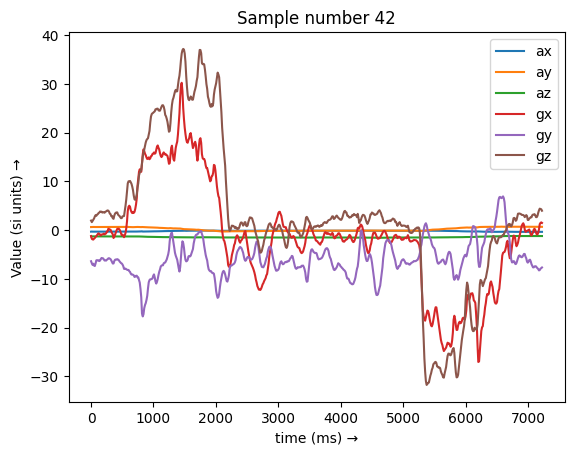

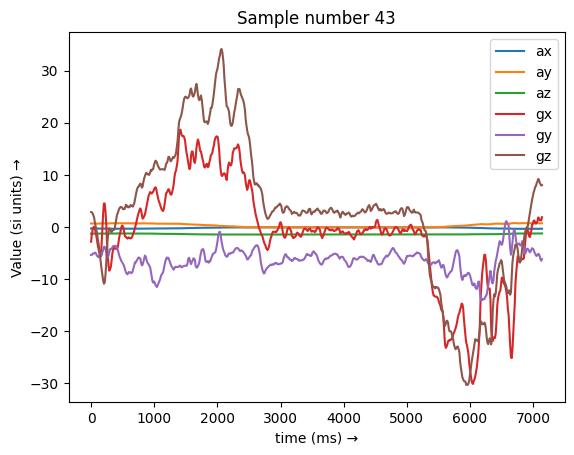

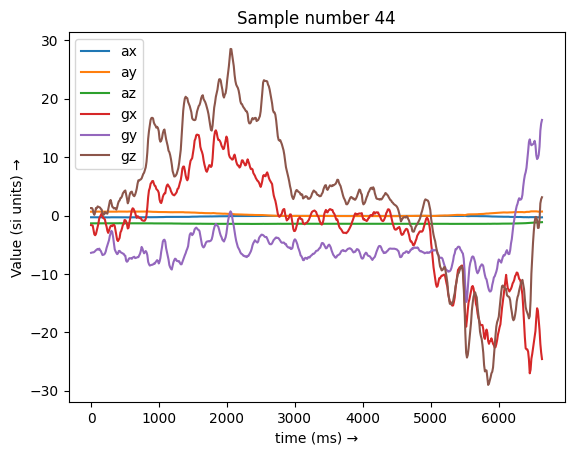

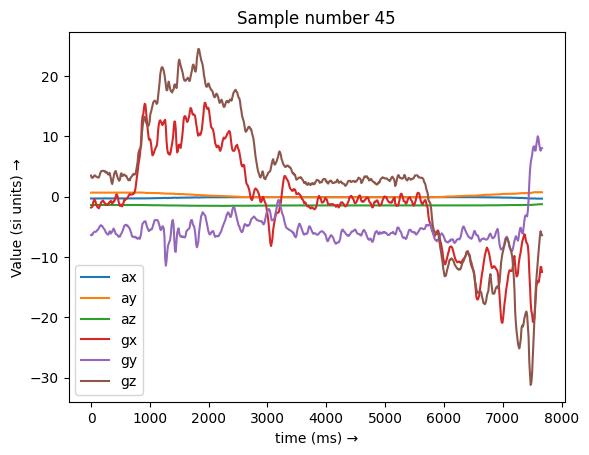

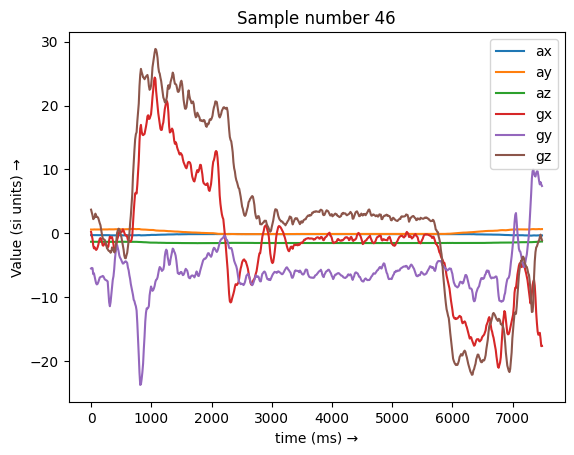

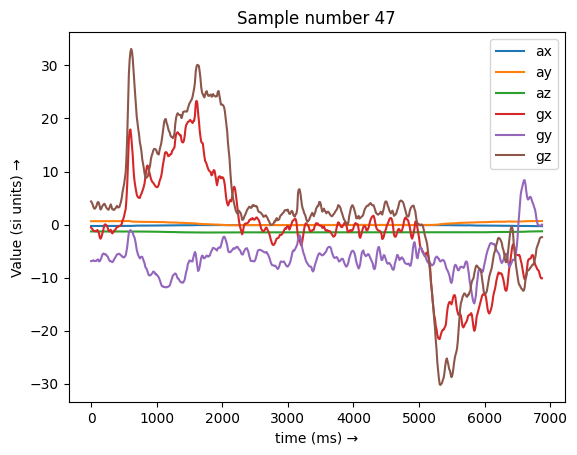

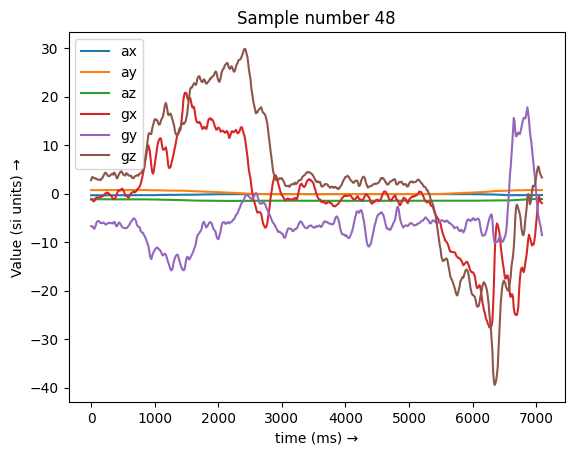

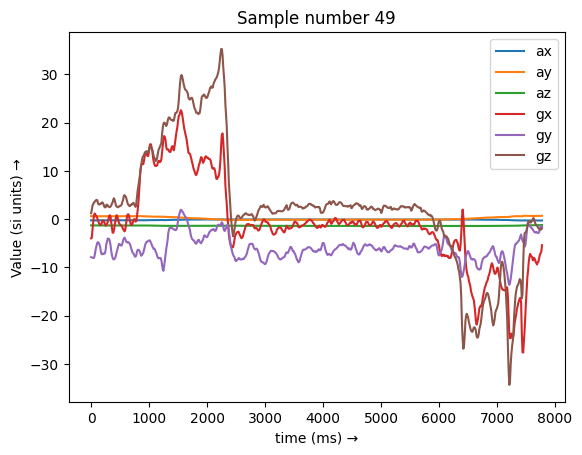

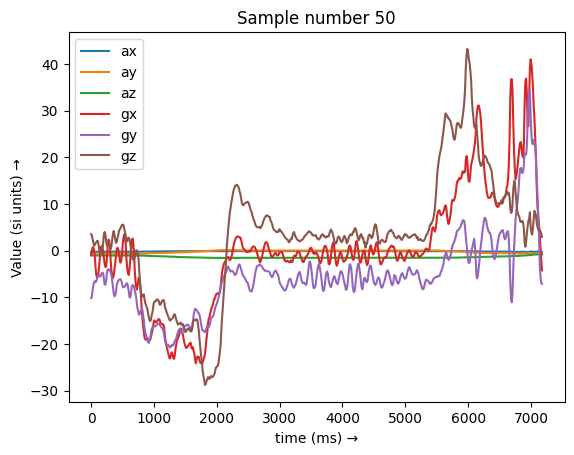

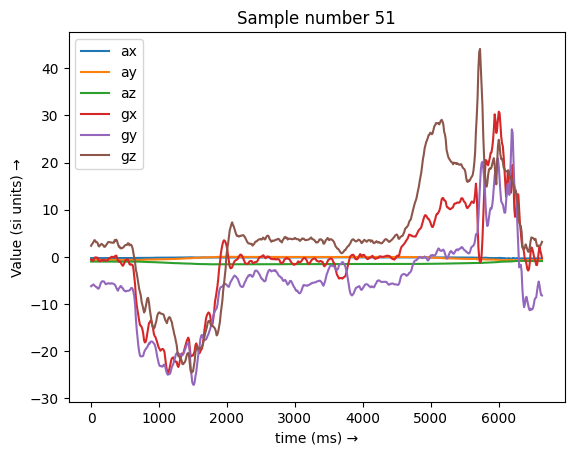

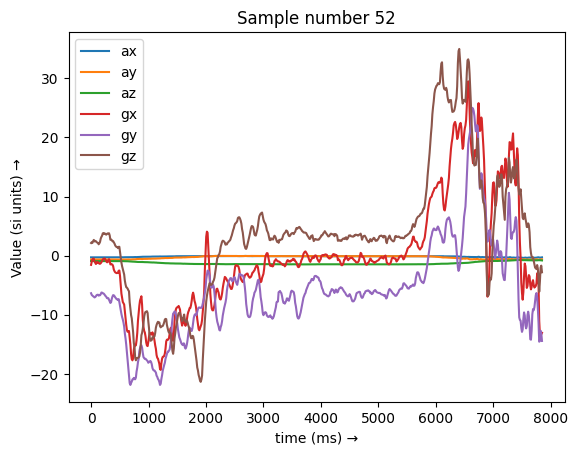

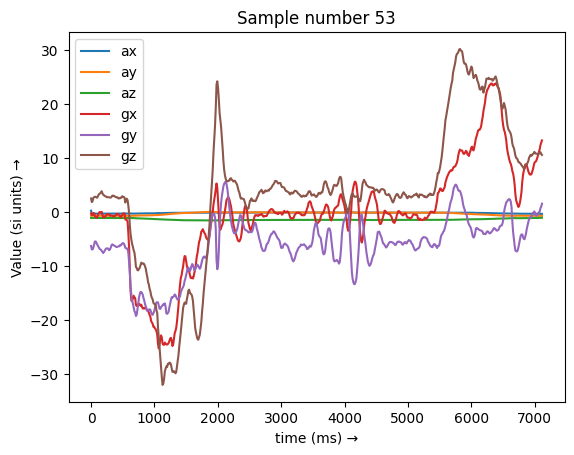

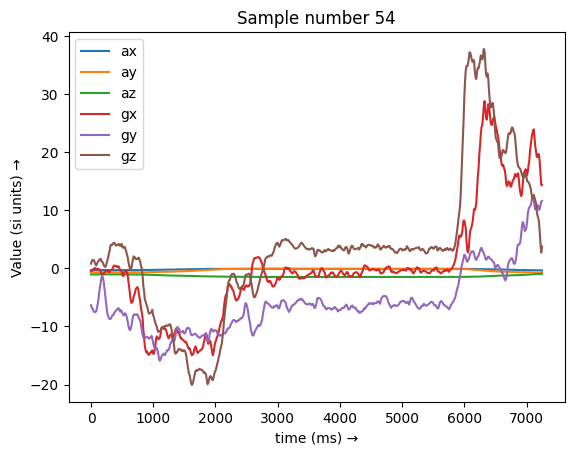

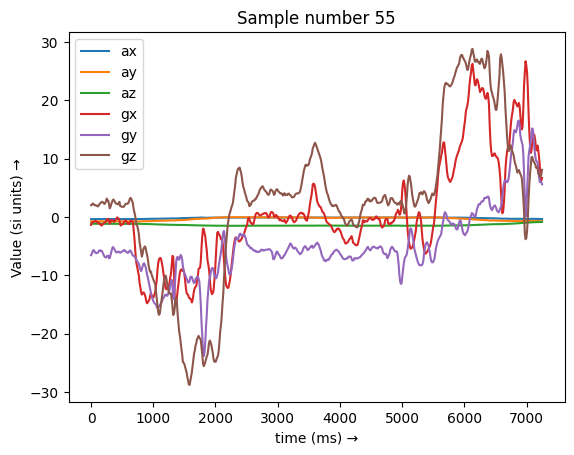

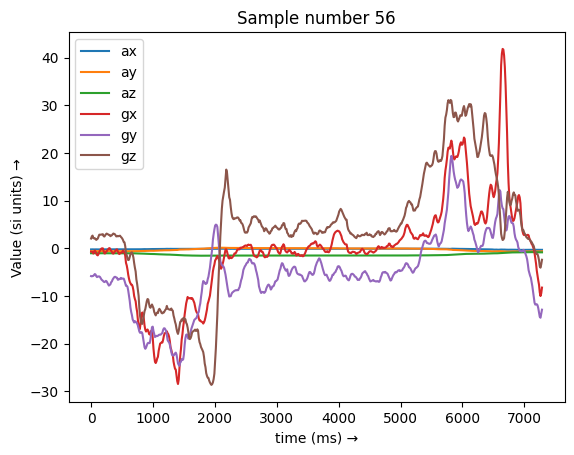

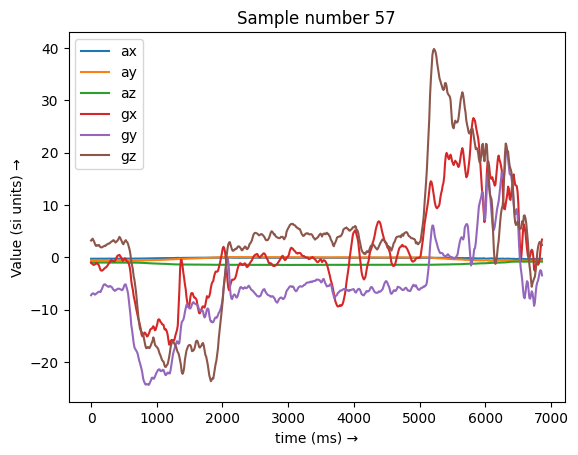

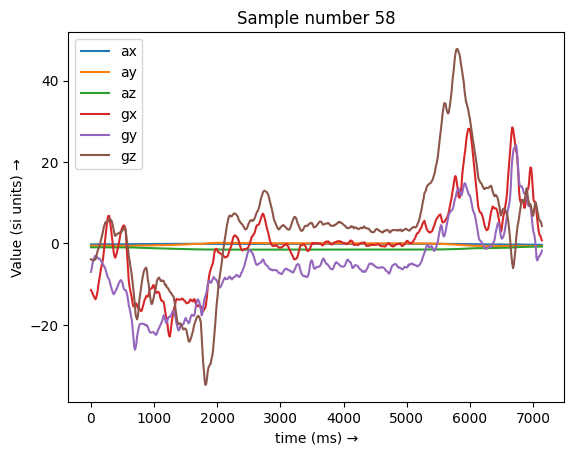

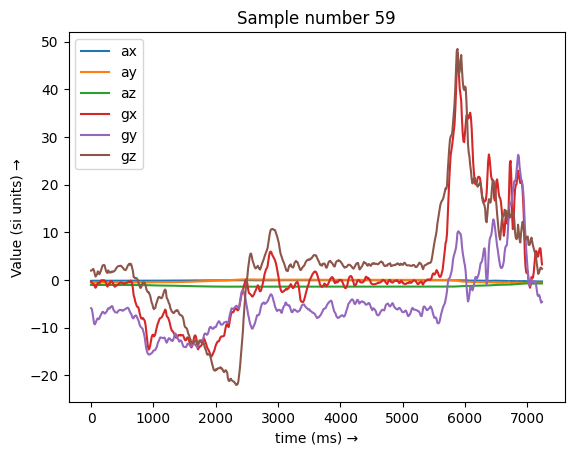

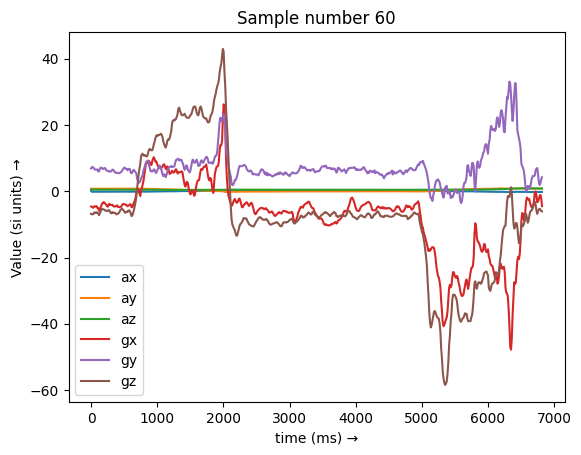

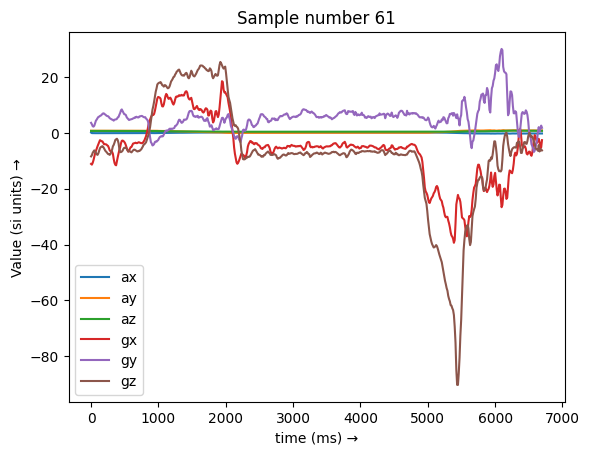

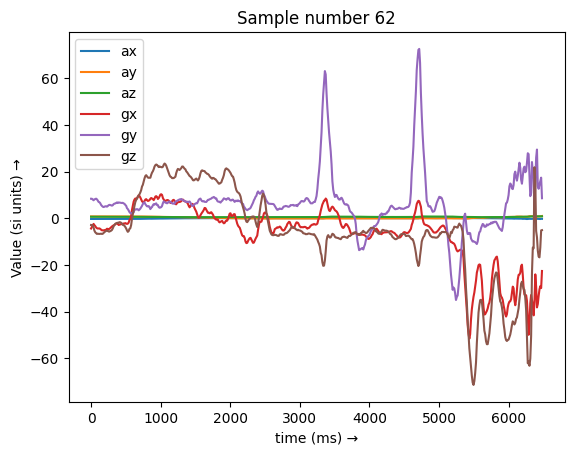

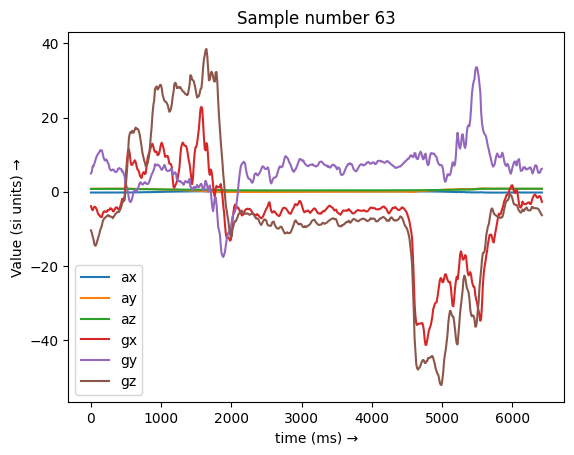

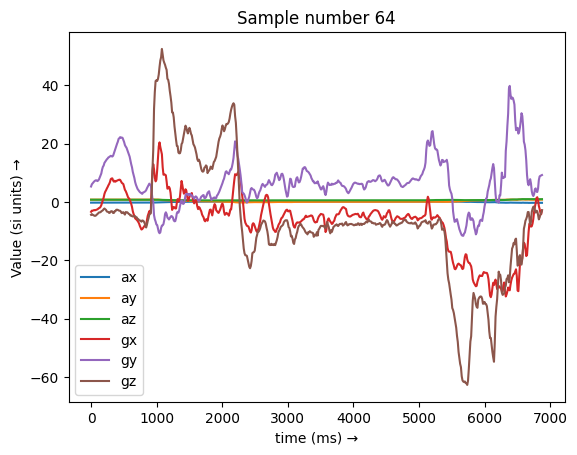

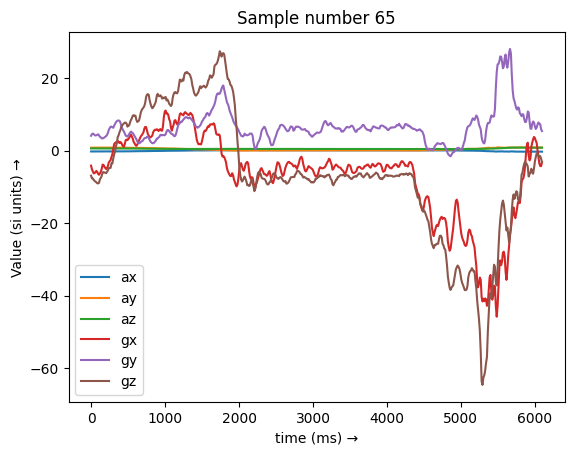

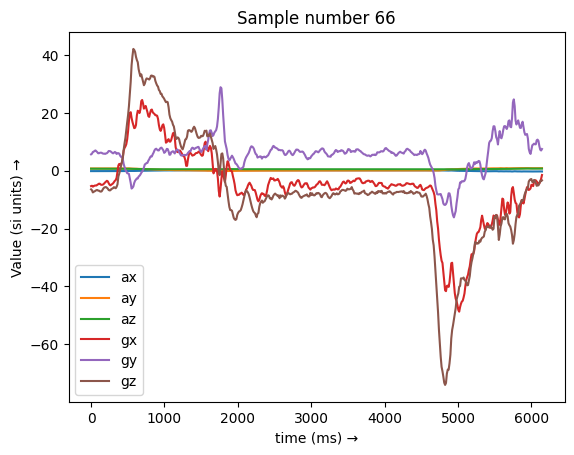

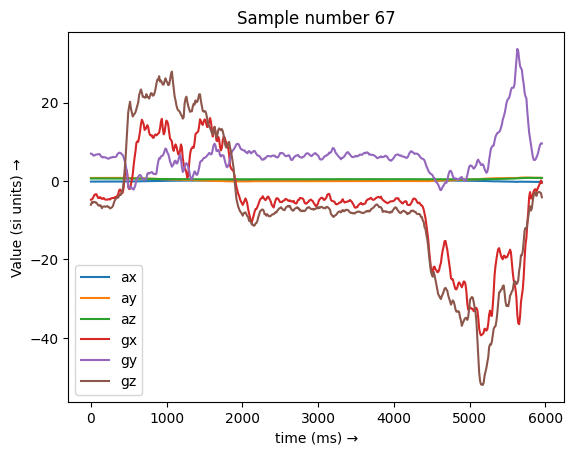

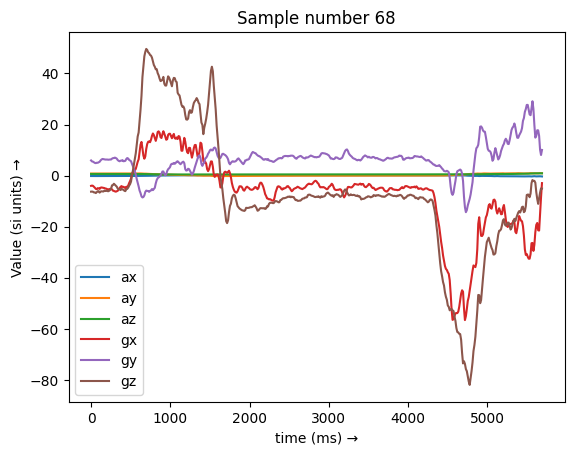

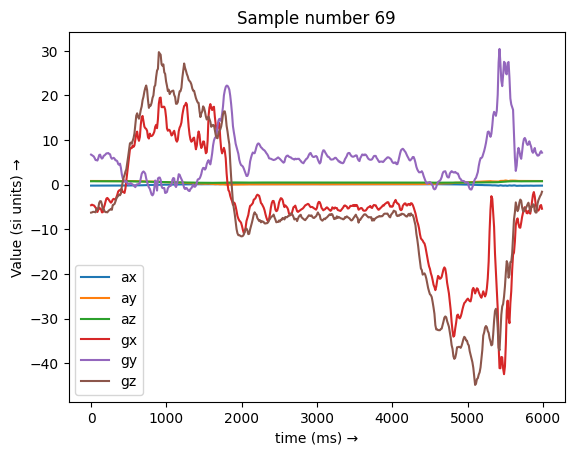

In [ ]:
for i in range(70):
  plot_data(km[i],i)

##**Kmeans unsupervised learning approach**

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from tslearn.metrics import soft_dtw
# soft_dtw_score = soft_dtw(x, y, gamma=.1)
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(data)

TimeSeriesKMeans(max_iter=10, metric='dtw')

In [ ]:
model.predict(aj[1])

/usr/local/lib/python3.10/dist-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 517 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
model.predict(aj[2])

/usr/local/lib/python3.10/dist-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 526 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
model.predict(an[1])

/usr/local/lib/python3.10/dist-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 705 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

/usr/local/lib/python3.10/dist-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 705 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


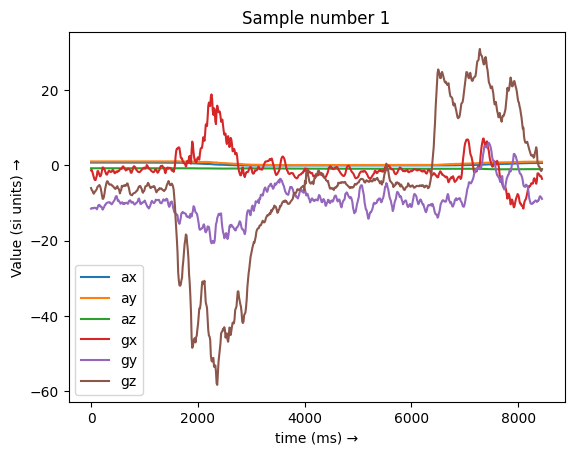

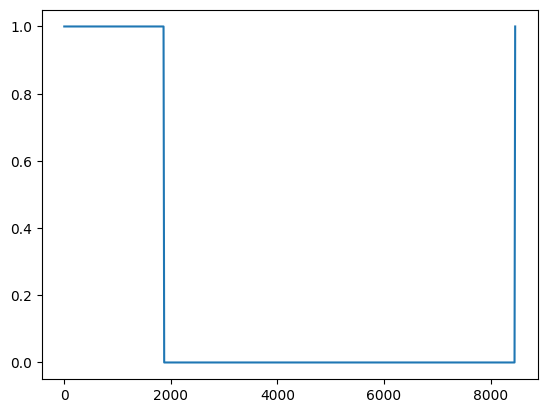

In [ ]:
y = model.predict(an[1])
plot_data(an[1],1)
t = np.linspace(0,len(an[1])*12,len(an[1]))
plt.plot(t,y)

In [ ]:
model.predict(an[9])

/usr/local/lib/python3.10/dist-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 726 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##**Hierarchical clustering**

In [ ]:
data3 = data.copy()

In [ ]:
data3 = data3[:100]
distance_matrix = data3.values

In [ ]:
distance_matrix

array([[ -0.26,  -1.13,   0.4 , ..., 129.13,  12.  ,   1.  ],
       [ -0.26,  -1.13,   0.4 , ..., 110.03,  12.  ,   1.  ],
       [ -0.26,  -1.13,   0.4 , ..., 110.03,  12.  ,   1.  ],
       ...,
       [ -0.66,  -0.83,   0.22, ..., 117.38,  12.  ,   1.  ],
       [ -0.69,  -0.84,   0.21, ..., 129.13,  12.  ,   1.  ],
       [ -0.69,  -0.83,   0.22, ..., 127.66,  13.  ,   1.  ]])

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Perform hierarchical clustering using the linkage function
# You can choose different linkage methods like 'single', 'complete', 'average', etc.
# Adjust the method and metric based on your specific requirements
linkage_matrix = linkage(distance_matrix, method='single', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 3, criterion='maxclust')
data3['cluster'] = cluster_labels
print(np.unique(cluster_labels))

[1 2 3]


<ipython-input-45-9f9ef1971f94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['cluster'] = cluster_labels


In [ ]:
data3

ax    ay    az     gx     gy     gz      mx      my      mz    dt  \
0  -0.26 -1.13  0.40 -11.56 -15.10  -5.36 -474.57  214.92  129.13  12.0   
1  -0.26 -1.13  0.40 -11.52 -15.50  -5.29 -482.19  213.39  110.03  12.0   
2  -0.26 -1.13  0.40 -11.14 -15.56  -5.30 -473.05  213.39  110.03  12.0   
3  -0.26 -1.14  0.40 -11.17 -15.70  -5.23 -468.48  202.69  105.63  12.0   
4  -0.27 -1.14  0.40 -11.15 -15.46  -4.99 -474.57  211.86  123.25  13.0   
..   ...   ...   ...    ...    ...    ...     ...     ...     ...   ...   
95 -0.59 -0.86  0.23 -35.17 -14.36  60.04 -480.67  233.27  129.13  14.0   
96 -0.63 -0.84  0.22 -29.27 -16.04  54.33 -494.39  222.57  130.60  12.0   
97 -0.66 -0.83  0.22 -25.39 -14.71  49.64 -486.77  217.98  117.38  12.0   
98 -0.69 -0.84  0.21 -22.52 -14.13  43.76 -483.72  217.98  129.13  12.0   
99 -0.69 -0.83  0.22 -20.76 -10.23  36.87 -485.24  216.45  127.66  13.0   

    cluster  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
95        2  
96        3  
97        1  
98        1  
99        1  

[100 rows x 11 columns]

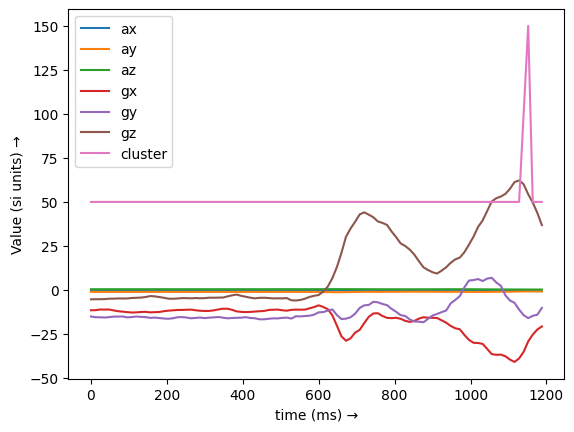

In [ ]:
def plot_data2(df):
  right_arrow = "\u2192"
  # Plot the curves for each column of data
  plt.plot(df.index*12, df['ax'], label='ax')
  plt.plot(df.index*12, df['ay'], label='ay')
  plt.plot(df.index*12, df['az'], label='az')
  plt.plot(df.index*12, df['gx'], label='gx')
  plt.plot(df.index*12, df['gy'], label='gy')
  plt.plot(df.index*12, df['gz'], label='gz')
  plt.plot(df.index*12, df['cluster']*50, label='cluster')
  # plt.plot(df.index*12, df['mx'], label='mx')
  # plt.plot(df.index*12, df['my'], label='my')
  # plt.plot(df.index*12, df['mz'], label='mz')

  # Add legend and axis labels
  # plt.title("Sample number "+str(i))
  plt.legend()
  plt.xlabel('time (ms) '+right_arrow)
  plt.ylabel('Value (si units) '+right_arrow)

  # Show the plot
  plt.show()
plot_data2(data3)

### taking the another 100 samples

In [ ]:
data3 = data.copy()

In [ ]:
data3 = data3[1500:1800]
distance_matrix = data3.values

In [ ]:
data3

ax    ay    az     gx     gy     gz      mx      my      mz    dt
1500 -0.43 -1.27  0.27  40.76 -17.65   1.05 -453.23  214.92  126.19  13.0
1501 -0.42 -1.30  0.28  44.40 -16.45  12.45 -460.85  222.57  121.78  12.0
1502 -0.43 -1.31  0.28  41.89 -14.77  17.68 -457.81  222.57  133.54  12.0
1503 -0.42 -1.31  0.30  32.05 -12.52  17.56 -453.23  214.92  123.25  12.0
1504 -0.43 -1.30  0.30  21.96 -11.37  13.82 -474.57  217.98  126.19  12.0
...    ...   ...   ...    ...    ...    ...     ...     ...     ...   ...
1795 -0.96 -0.47 -0.14 -13.20 -16.27  -6.28 -460.85  234.80  101.22  13.0
1796 -0.96 -0.47 -0.14 -13.28 -16.20  -6.28 -447.14  242.45  105.63  12.0
1797 -0.96 -0.47 -0.14 -13.16 -16.05  -6.09 -453.23  257.74  105.63  12.0
1798 -0.97 -0.47 -0.14 -12.96 -16.01  -5.80 -448.66  247.04  110.03  12.0
1799 -0.96 -0.47 -0.14 -12.42 -15.81  -5.53 -453.23  251.63  111.50  12.0

[300 rows x 10 columns]

In [ ]:
distance_matrix

array([[-4.3000e-01, -1.2700e+00,  2.7000e-01, ...,  2.1492e+02,
         1.2619e+02,  1.3000e+01],
       [-4.2000e-01, -1.3000e+00,  2.8000e-01, ...,  2.2257e+02,
         1.2178e+02,  1.2000e+01],
       [-4.3000e-01, -1.3100e+00,  2.8000e-01, ...,  2.2257e+02,
         1.3354e+02,  1.2000e+01],
       ...,
       [-9.6000e-01, -4.7000e-01, -1.4000e-01, ...,  2.5774e+02,
         1.0563e+02,  1.2000e+01],
       [-9.7000e-01, -4.7000e-01, -1.4000e-01, ...,  2.4704e+02,
         1.1003e+02,  1.2000e+01],
       [-9.6000e-01, -4.7000e-01, -1.4000e-01, ...,  2.5163e+02,
         1.1150e+02,  1.2000e+01]])

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Perform hierarchical clustering using the linkage function
# You can choose different linkage methods like 'single', 'complete', 'average', etc.
# Adjust the method and metric based on your specific requirements
linkage_matrix = linkage(distance_matrix, method='single', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 3, criterion='maxclust')
data3['cluster'] = cluster_labels
print(np.unique(cluster_labels))

[1 2 3]


In [ ]:
data3

ax    ay    az     gx     gy     gz      mx      my      mz    dt  \
1500 -0.43 -1.27  0.27  40.76 -17.65   1.05 -453.23  214.92  126.19  13.0   
1501 -0.42 -1.30  0.28  44.40 -16.45  12.45 -460.85  222.57  121.78  12.0   
1502 -0.43 -1.31  0.28  41.89 -14.77  17.68 -457.81  222.57  133.54  12.0   
1503 -0.42 -1.31  0.30  32.05 -12.52  17.56 -453.23  214.92  123.25  12.0   
1504 -0.43 -1.30  0.30  21.96 -11.37  13.82 -474.57  217.98  126.19  12.0   
...    ...   ...   ...    ...    ...    ...     ...     ...     ...   ...   
1795 -0.96 -0.47 -0.14 -13.20 -16.27  -6.28 -460.85  234.80  101.22  13.0   
1796 -0.96 -0.47 -0.14 -13.28 -16.20  -6.28 -447.14  242.45  105.63  12.0   
1797 -0.96 -0.47 -0.14 -13.16 -16.05  -6.09 -453.23  257.74  105.63  12.0   
1798 -0.97 -0.47 -0.14 -12.96 -16.01  -5.80 -448.66  247.04  110.03  12.0   
1799 -0.96 -0.47 -0.14 -12.42 -15.81  -5.53 -453.23  251.63  111.50  12.0   

      cluster  
1500        1  
1501        1  
1502        1  
1503        1  
1504        2  
...       ...  
1795        2  
1796        2  
1797        2  
1798        2  
1799        2  

[300 rows x 11 columns]

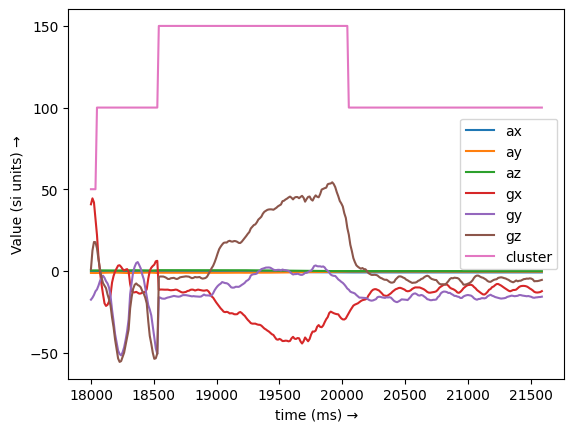

In [ ]:
def plot_data2(df):
  right_arrow = "\u2192"
  # Plot the curves for each column of data
  plt.plot(df.index*12, df['ax'], label='ax')
  plt.plot(df.index*12, df['ay'], label='ay')
  plt.plot(df.index*12, df['az'], label='az')
  plt.plot(df.index*12, df['gx'], label='gx')
  plt.plot(df.index*12, df['gy'], label='gy')
  plt.plot(df.index*12, df['gz'], label='gz')
  plt.plot(df.index*12, df['cluster']*50, label='cluster')
  # plt.plot(df.index*12, df['mx'], label='mx')
  # plt.plot(df.index*12, df['my'], label='my')
  # plt.plot(df.index*12, df['mz'], label='mz')

  # Add legend and axis labels
  # plt.title("Sample number "+str(i))
  plt.legend()
  plt.xlabel('time (ms) '+right_arrow)
  plt.ylabel('Value (si units) '+right_arrow)

  # Show the plot
  plt.show()
plot_data2(data3)